# **ColocBoost Results: Preliminary Summary**

This notebook aims to perform a preliminary exploration for the colocalization results from a novel developing tool [ColocBoost](https://github.com/StatFunGen/colocboost) to validate its accuracy and specificity and provide more insights for futher explorations, adapted from Xuewei's original notebook(`/mnt/vast/hpc/csg/xc2270/colocboost/pipeline/test_code/summary.ipynb`)

## **Input**

* **Colocalization results (one iteration)** across 7 image GWAS summary statistics:
  `/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis`



## **Output Overview**

1. **UpSet plots** at the *colocalization event* level:

   * 95% colocalization confidence sets (**CoS**)
   * Trait-specific uncolocalized confidence sets (**uCoS**)

2. Overview of **ambiguous colocalization signals** at the *colocalization event* level

3. **UpSet plots** at the *block* level:

   * For CoS and uCoS confidence sets

4. Comparison with **Finemapping Upset plot**:

* In the Finemapping UpSet plot, two traits are considered to share a signal if they both have any signal within the same genomic block.
* This definition does not require the traits to share the exact same SNPs, as that would be overly conservative.
* Overall, ColocBoost captures more signals than fine-mapping, demonstrating higher sensitivity and specificity. The consistent signal patterns further validate the effectiveness of ColocBoost.

5. Overlap between variants from colocboost and the **GVC gene list**

* a. Analysis steps:

  * To assess the overlap between colocboost-identified variants and the GVC gene list, I defined a **cis-window** for each gene as:[gene_start - 500kb, gene_end + 500kb]

  > This definition is **strand-agnostic** and does not rely on transcription start site (TSS) or transcription end site (TES), which are strand-dependent.

  * For each GVC gene, I checked whether any variants identified by colocboost fall within its cis-window. If a match was found, I added a region column in the format: `chrN:gene_start-500,000_gene_end+500,000`

  * Below is the annotated table showing GVC genes and whether colocboost variants fall within their cis-windows:

    ```   
    #chr     start       end         gene_id strand  gene_name is_in_cis_window                cis_window  contained_variants
            <char>     <int>     <int>          <char> <char>     <char>             <lgcl>                    <char>              <char>
        1:   chr1 207496146 207641764 ENSG00000203710      +        CR1             FALSE                      <NA>                <NA>
        2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2             FALSE                      <NA>                <NA>
        3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1             FALSE                      <NA>                <NA>
        4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1             FALSE                      <NA>                <NA>
    ```

* b. Overlap Results

  Out of the **21 GVC genes** (note: two genes share the same Ensembl ID):
  * **4 genes** were can be explained by colocboost from the **one-iteration results of 7 AI_image GWAS** alone
  * **APBB3(AD2), PILRA(Aging1), SPI1(AD2), ABI3(Aging5)** were all identified by uCoS.

6. Overlap between variants from colocboost and the [76 gene list](https://adsp.niagads.org/gvc-top-hits-list/)
* a. Analysis steps:
  same as 5.

* b. Overlap Results

  Out of the **76 genes** (note: two genes share the same Ensembl ID):

  * **51 genes** were identified by colocboost from the **one-iteration results of 6 AD GWAS and 7 AI_image GWAS**:

    * **3 genes** TNIP1, DOC2A(Aging2-Aging3), SLC2A4RG(Aging1-Aging3) had colocalized variants **within their cis-windows**.Only the variant in TNIP1 is colocalized across AD related traits(Aging2-AD2).
    * **8 gene** WDR12(Aging5), HLA-DQA1(Aging5), UMAD1(Aging5), ICA1(Aging2), SPDYE3(Aging2), SPI1(AD2), FOXF1(Aging5), ABI3(Aging5) had uncolocalized variants **within its cis-window**


## **Analysis Steps**

* **Variant-level summary** is generated using the ColocBoost function:
  `get_colocboost_summary()`

* **Block-level summary** is derived from SNP-to-gene mapping analysis



## **Preliminary Summary**

### 🔹 Colocalization Event Level

* **43 CoS** (95% credible sets showing colocalization)
* **170 uCoS** (trait-specific sets with no shared colocalization)
* **1 ambiguous CoS** (cases with unclear signal attribution)

### 🔹 Block Level

* **188 genomic blocks** contain at least one of:

  * CoS
  * uCoS
  * Ambiguous CoS

### 🔹 SNP Level

* **1,690 SNPs** in CoS sets
* **12,966 SNPs** in uCoS sets
* **14,656 total unique SNPs** involved in either CoS or uCoS


## ⚠️ Note

2. Since the input is one iteration colocboost results under the assumption of one causal variant per block, the UpSet plots at colocalization event level and at block level should be the same.



In [2]:
# load packages
library(data.table)
library(tidyverse)
library("UpSetR")
for(file in list.files("/home/rl3328/image_QTL/colocboost/release_M1_Free", full.names = T)) {source(file)}


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday() 

In [ ]:
# Extract colocboost summary
files <- list.files("/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis/", pattern = "\\.rds$", full.names = TRUE)
length(files)
cos_summary <- ucos_summary <- ambiguous_cos_summary <- c()
for (file in files){
    res <- readRDS(file)
    if (!"cos_summary" %in% names(res)) next
    region_name <- str_extract(file, "chr[0-9XY]+_[0-9]+_[0-9]+")
    print(region_name)
    tmp <- suppressMessages(get_colocboost_summary(res, summary_level = 3, region_name = region_name))
    if (!is.null(tmp$cos_summary)){
        tt <- tmp$cos_summary
        tt$file <- file
        cos_summary <- rbind(cos_summary, tt)
    }
    if (!is.null(tmp$ucos_summary)){
        tt <- tmp$ucos_summary
        tt$file <- file
        ucos_summary <- rbind(ucos_summary, tt)
    }
    if (!is.null(tmp$ambiguous_cos_summary)){
        tt <- tmp$ambiguous_cos_summary
        tt$file <- file
        ambiguous_cos_summary <- rbind(ambiguous_cos_summary, tt)
    }
}


[1] 1361

In [4]:
cos_summary %>% dim
ucos_summary %>% dim
ambiguous_cos_summary %>% dim
# fwrite(cos_summary, "cos_summary.tsv", sep = '\t')
# fwrite(ucos_summary, "ucos_summary.tsv", sep = '\t')
# fwrite(ambiguous_cos_summary, "ambiguous_cos_summary.tsv", sep = '\t')

[1] 43 14

[1] 170  11

[1]  1 12

In [3]:
cos_summary <- fread("cos_summary.tsv")
ucos_summary <- fread("ucos_summary.tsv")
ambiguous_cos_summary <- fread("ambiguous_cos_summary.tsv")

In [5]:
# Data preparation for UpSet plot
cohorts <- c("image_AD1", "image_AD2", "image_Aging1", "image_Aging2", "image_Aging3", "image_Aging4","image_Aging5")
coloc <- vector("list", length(cohorts)) %>% setNames(cohorts)
for (i in 1:nrow(cos_summary)){
    traits <- cos_summary$colocalized_outcomes[i]
    for (con in cohorts){
        if_coloc <- grepl(con, traits)
        if (if_coloc){
            coloc[[con]] <- c(coloc[[con]], paste0(cos_summary$cos_id[i], "_", cos_summary$top_variable[i]))
        }
    }
}
coloc <- lapply(coloc, unique)
unique_cos <- sapply(coloc, length)
unique_cos

image_AD1    image_AD2 image_Aging1 image_Aging2 image_Aging3 image_Aging4 
          14           19           10           19           17           10 
image_Aging5 
           6

pdf 
  2

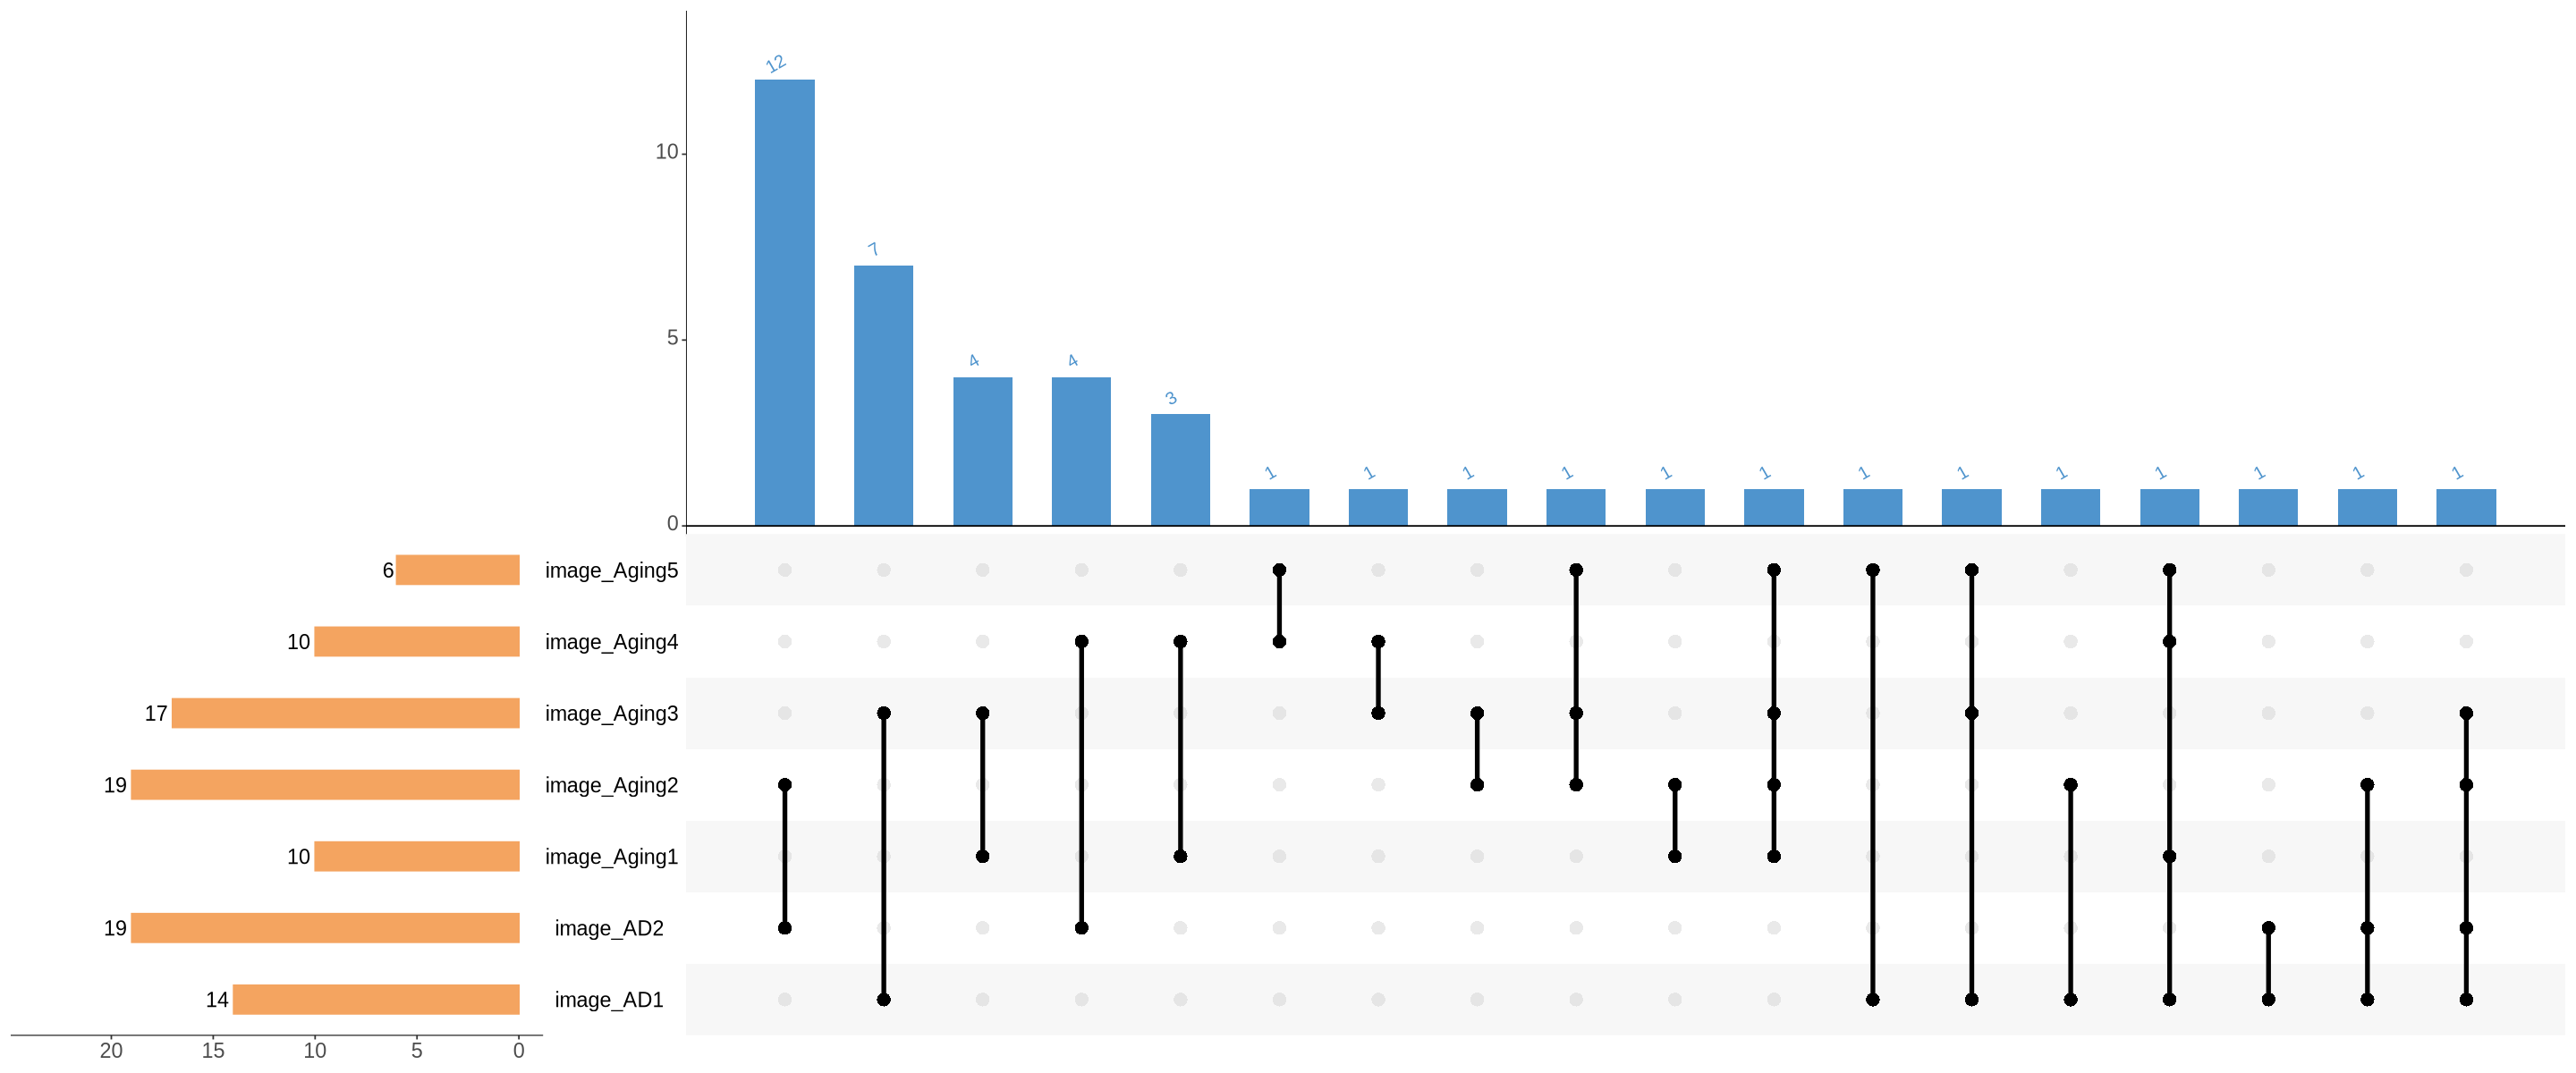

In [6]:
options(repr.plot.width = 24, repr.plot.height = 10)

max_size <- max(unique_cos)
p <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = cohorts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

# Display the plot in the notebook
print(p)

# Save the plot to a file
png("upset_plot_cos.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [7]:
# Data preparation for UpSet plot for ucos
for (i in 1:nrow(ucos_summary)){
    traits <- ucos_summary$outcomes[i]
    for (con in cohorts){
        if_coloc <- grepl(con, traits)
        if (if_coloc){
            coloc[[con]] <- c(coloc[[con]], paste0(ucos_summary$ucos_id[i], "_", ucos_summary$top_variable[i]))
        }
    }
}
coloc <- lapply(coloc, unique)
unique_ucos <- sapply(coloc, length)
unique_ucos

image_AD1    image_AD2 image_Aging1 image_Aging2 image_Aging3 image_Aging4 
          34           41           44           42           31           36 
image_Aging5 
          37

pdf 
  2

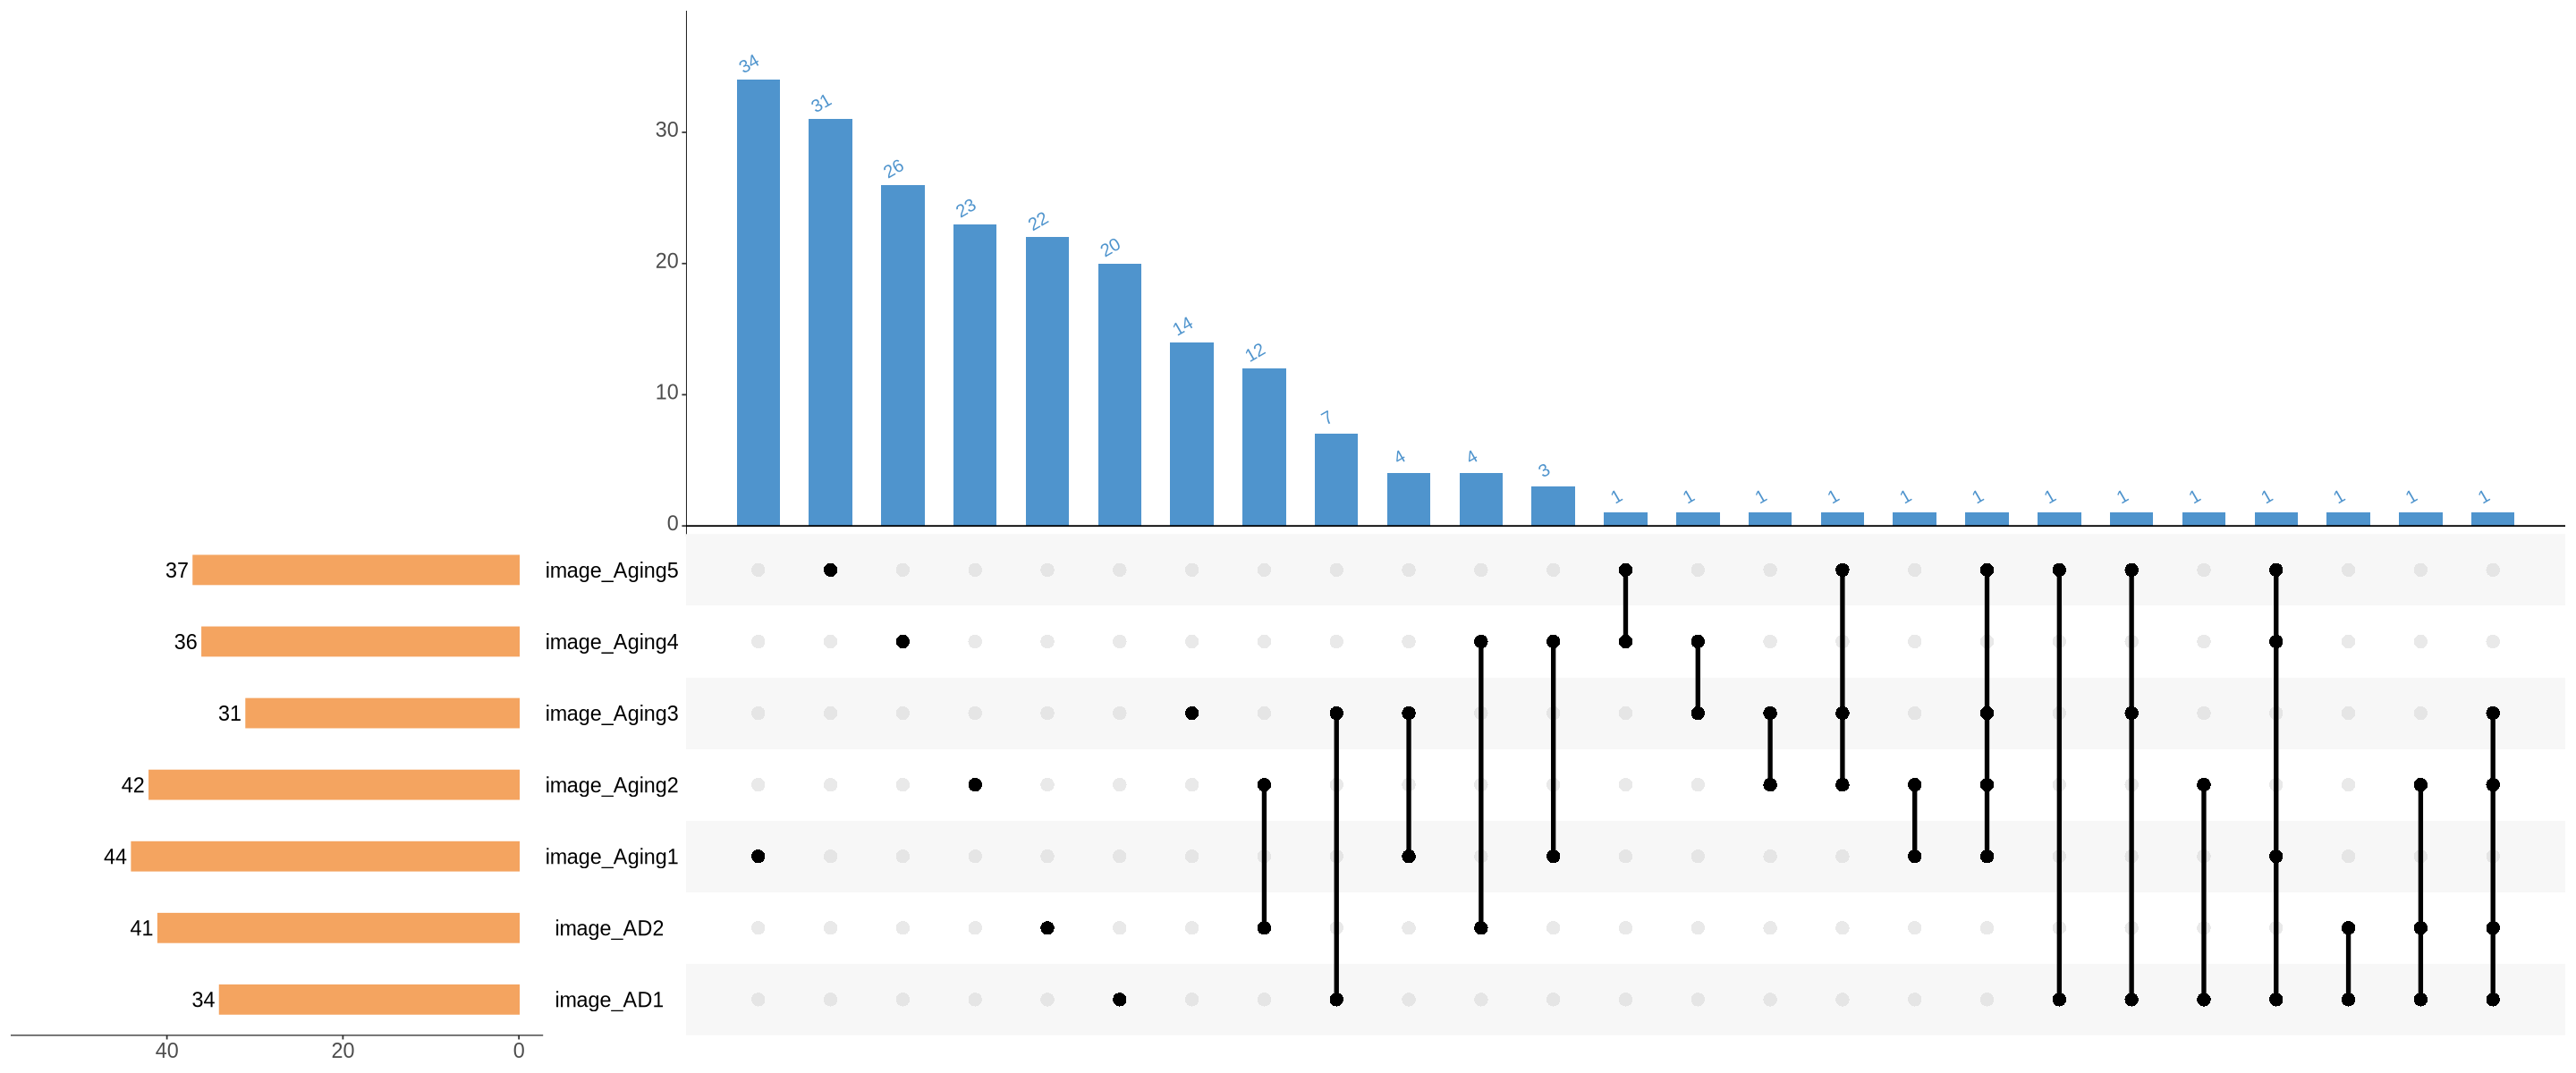

In [8]:
options(repr.plot.width = 24, repr.plot.height = 10)
library("UpSetR")
max_size <- max(unique_ucos)
p <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = cohorts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

# Display the plot in the notebook
print(p)

# Save the plot to a file
png("upset_plot_ucos.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [9]:
files <- c(cos_summary %>% pull(file), ucos_summary %>% pull(file)) %>% unique
length(files)

[1] 188

### 2. Ambiguous colocalization

In [5]:
ambiguous_cos_summary$file

[1] "/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr7_41703696_43119648.cb_xqtl_joint_gwas.rds"

Warning message in get_input_plot(cb_output, plot_cos_idx = plot_cos_idx, variant_coord = variant_coord, :
“No colocalized effects in this region!”


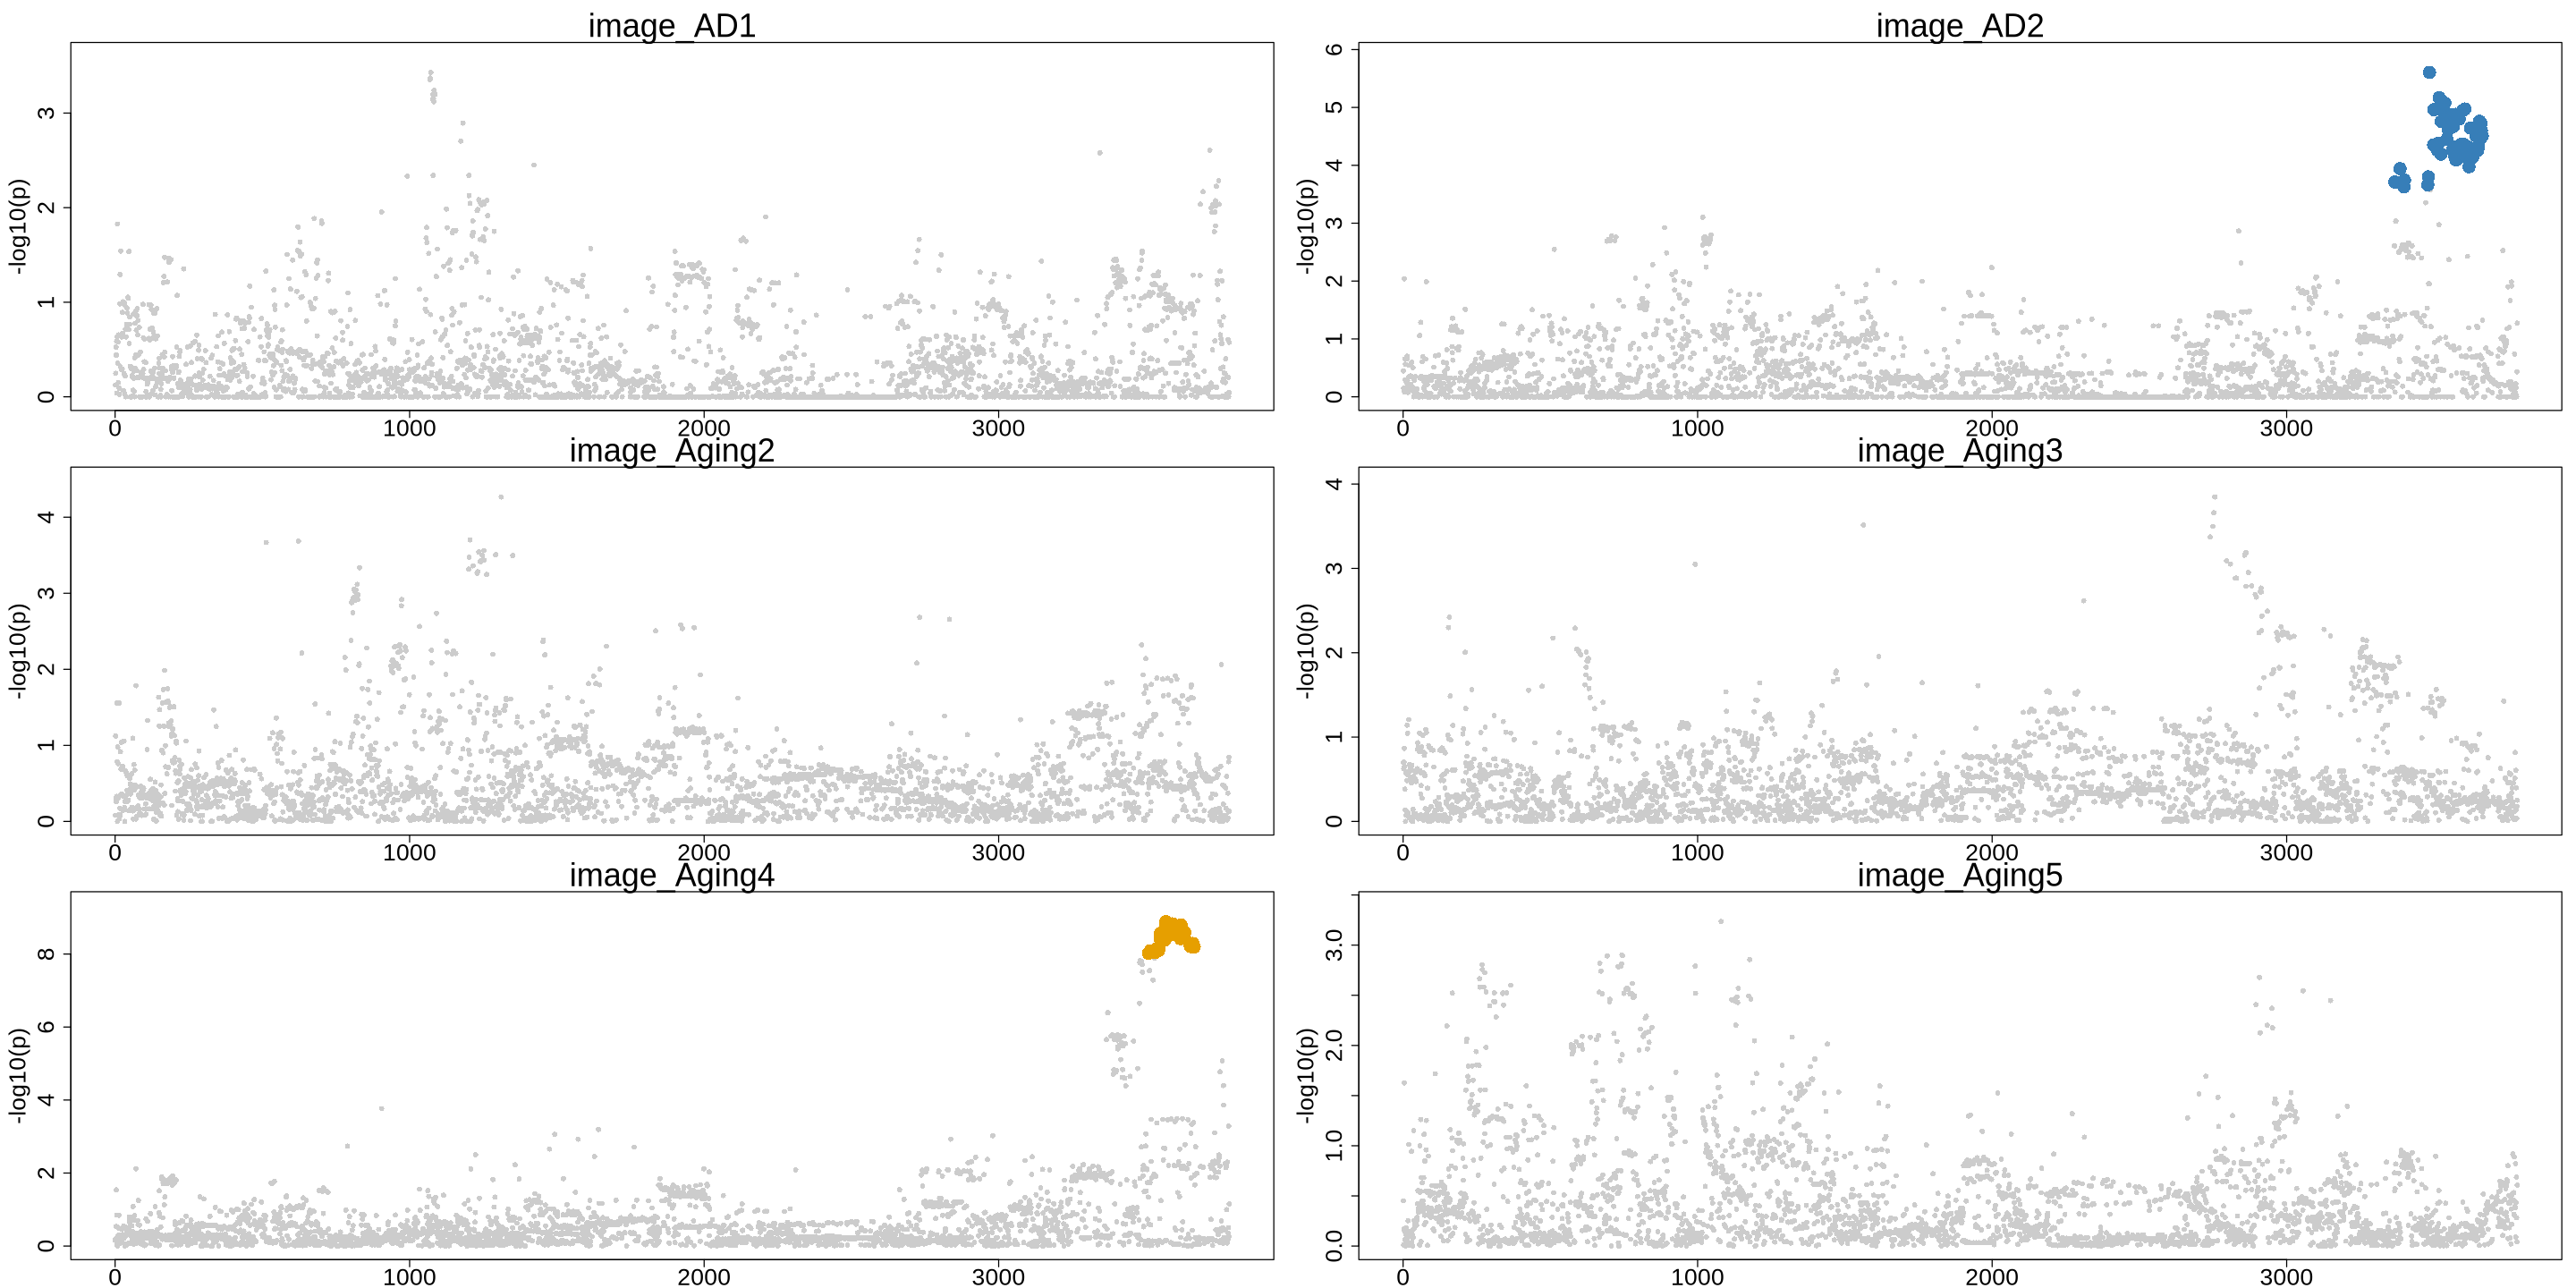

In [6]:
# Ambiguous_cos
res <- readRDS("/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr7_41703696_43119648.cb_xqtl_joint_gwas.rds")
options(repr.plot.width = 24, repr.plot.height = 12)

colocboost_plot(res, plot_ucos = TRUE, plot_all_outcome = TRUE)

### 3. Upset plots at study_block level

In [8]:
files <- list.files("/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis", pattern = "\\.rds$", full.names = TRUE)
s2g <- list()
for (i in 1:nrow(cos_summary)){
    cos_tmp <- cos_summary[i,]
    region_name <- cos_tmp$region_name
    files_tmp <- files[grep(region_name, files)]
    image_ad <- cos_tmp$target_outcome
    cb_results <- readRDS(files_tmp)
    coef <- cb_results$data_info$coef
    image_ad_cos <- cb_results$cos_details$cos$cos_variables[cos_tmp$cos_id]
    s2g_tmp <- c()
    for (i_cos in 1:length(image_ad_cos)){
        snps <- image_ad_cos[[i_cos]]
        vcp_cos <- cb_results$vcp[snps]
        coloc_trait <- cos_tmp$colocalized_outcomes[i_cos]
        event_ID = coloc_trait
        coloc_trait <- strsplit(coloc_trait, "; ")[[1]]
        coef_cos <- sapply(snps, function(ss){
            pos <- which(cb_results$data_info$variables == ss)
            tmp <- sapply(coloc_trait, function(tt) coef[[tt]][pos] )
            return(paste0(tmp, collapse = ";"))
        })
        variantID <- snps
        snps <- as.matrix(sapply(snps, function(ss) strsplit(ss, ":")[[1]] ))
        cos_id <- paste0(region_name, ":", cos_tmp$cos_id[i_cos])
        tmp <- tibble("#chr" = snps[1,],
                          "start" = snps[2,],
                          "end" = snps[2,],
                          "a1" = snps[4,],
                          "a2" = snps[3,],
                          "variant_ID" = variantID,
                          "region_ID" = region_name,
                          "event_ID" = event_ID,
                          "cos_ID" = cos_id,
                          "vcp" = vcp_cos,
                          "cos_npc" = cos_tmp$cos_npc,
                          "min_npc_outcome" = cos_tmp$min_npc_outcome,
                          "coef" = coef_cos
                         )
        s2g_tmp <- rbind(s2g_tmp, tmp)           
    }
    s2g[[i]] <- s2g_tmp
}

In [9]:
s2g <- Reduce(rbind, s2g)
s2g <- s2g %>% arrange(`#chr`, start)
s2g %>% head

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1,214963879,214963879,C,A,chr1:214963879:A:C,chr1_214114077_215979204,image_Aging3; image_Aging4,chr1_214114077_215979204:cos1:y5_y6,0.308998229,1.0000,1.0000,-0.00295357552328793;-0.00350825537272619
chr1,214966544,214966544,T,A,chr1:214966544:A:T,chr1_214114077_215979204,image_Aging3; image_Aging4,chr1_214114077_215979204:cos1:y5_y6,0.551378710,1.0000,1.0000,-0.0045110686509308;-0.00497147409598806
chr1,214968227,214968227,T,C,chr1:214968227:C:T,chr1_214114077_215979204,image_Aging3; image_Aging4,chr1_214114077_215979204:cos1:y5_y6,0.139518722,1.0000,1.0000,-0.00245884110595507;-0.00145974662852431
chr1,236230893,236230893,A,G,chr1:236230893:G:A,chr1_235656952_237008086,image_AD2; image_Aging4,chr1_235656952_237008086:cos1:y1_y5,0.011843439,0.9712,0.9712,0.000109647171223616;-4.90719712964009e-05
chr1,236231824,236231824,G,A,chr1:236231824:A:G,chr1_235656952_237008086,image_AD2; image_Aging4,chr1_235656952_237008086:cos1:y1_y5,0.009205362,0.9712,0.9712,9.15977434295378e-05;-4.19788158719159e-05
chr1,236232553,236232553,C,T,chr1:236232553:T:C,chr1_235656952_237008086,image_AD2; image_Aging4,chr1_235656952_237008086:cos1:y1_y5,0.009599897,0.9712,0.9712,9.53920530452249e-05;-4.26288587857485e-05


In [10]:
s2g %>% dim


[1] 1690   13

In [11]:
fwrite(s2g, "/home/rl3328/image_QTL/colocboost/image7/Image_meta_colocboost_export_filtered_cos.bed", sep = "\t")

In [14]:
s2g <- fread("/home/rl3328/image_QTL/colocboost/image7/Image_meta_colocboost_export_filtered_cos.bed")
cohorts <- c("image_AD1", "image_AD2", "image_Aging1", "image_Aging2", "image_Aging3", "image_Aging4","image_Aging5")
coloc <- vector("list", length(cohorts)) %>% setNames(cohorts)
for (i in 1:nrow(s2g)){
    traits <- s2g$event_ID[i]
    for (con in cohorts){
        if_coloc <- grepl(con, traits)
        if (if_coloc){
            coloc[[con]] <- c(coloc[[con]], s2g$cos_ID[i])
        }
    }
}
coloc <- lapply(coloc, unique)
unique_cos_block = sapply(coloc, length)
unique_cos_block

image_AD1    image_AD2 image_Aging1 image_Aging2 image_Aging3 image_Aging4 
          14           19           10           19           17           10 
image_Aging5 
           6

pdf 
  2

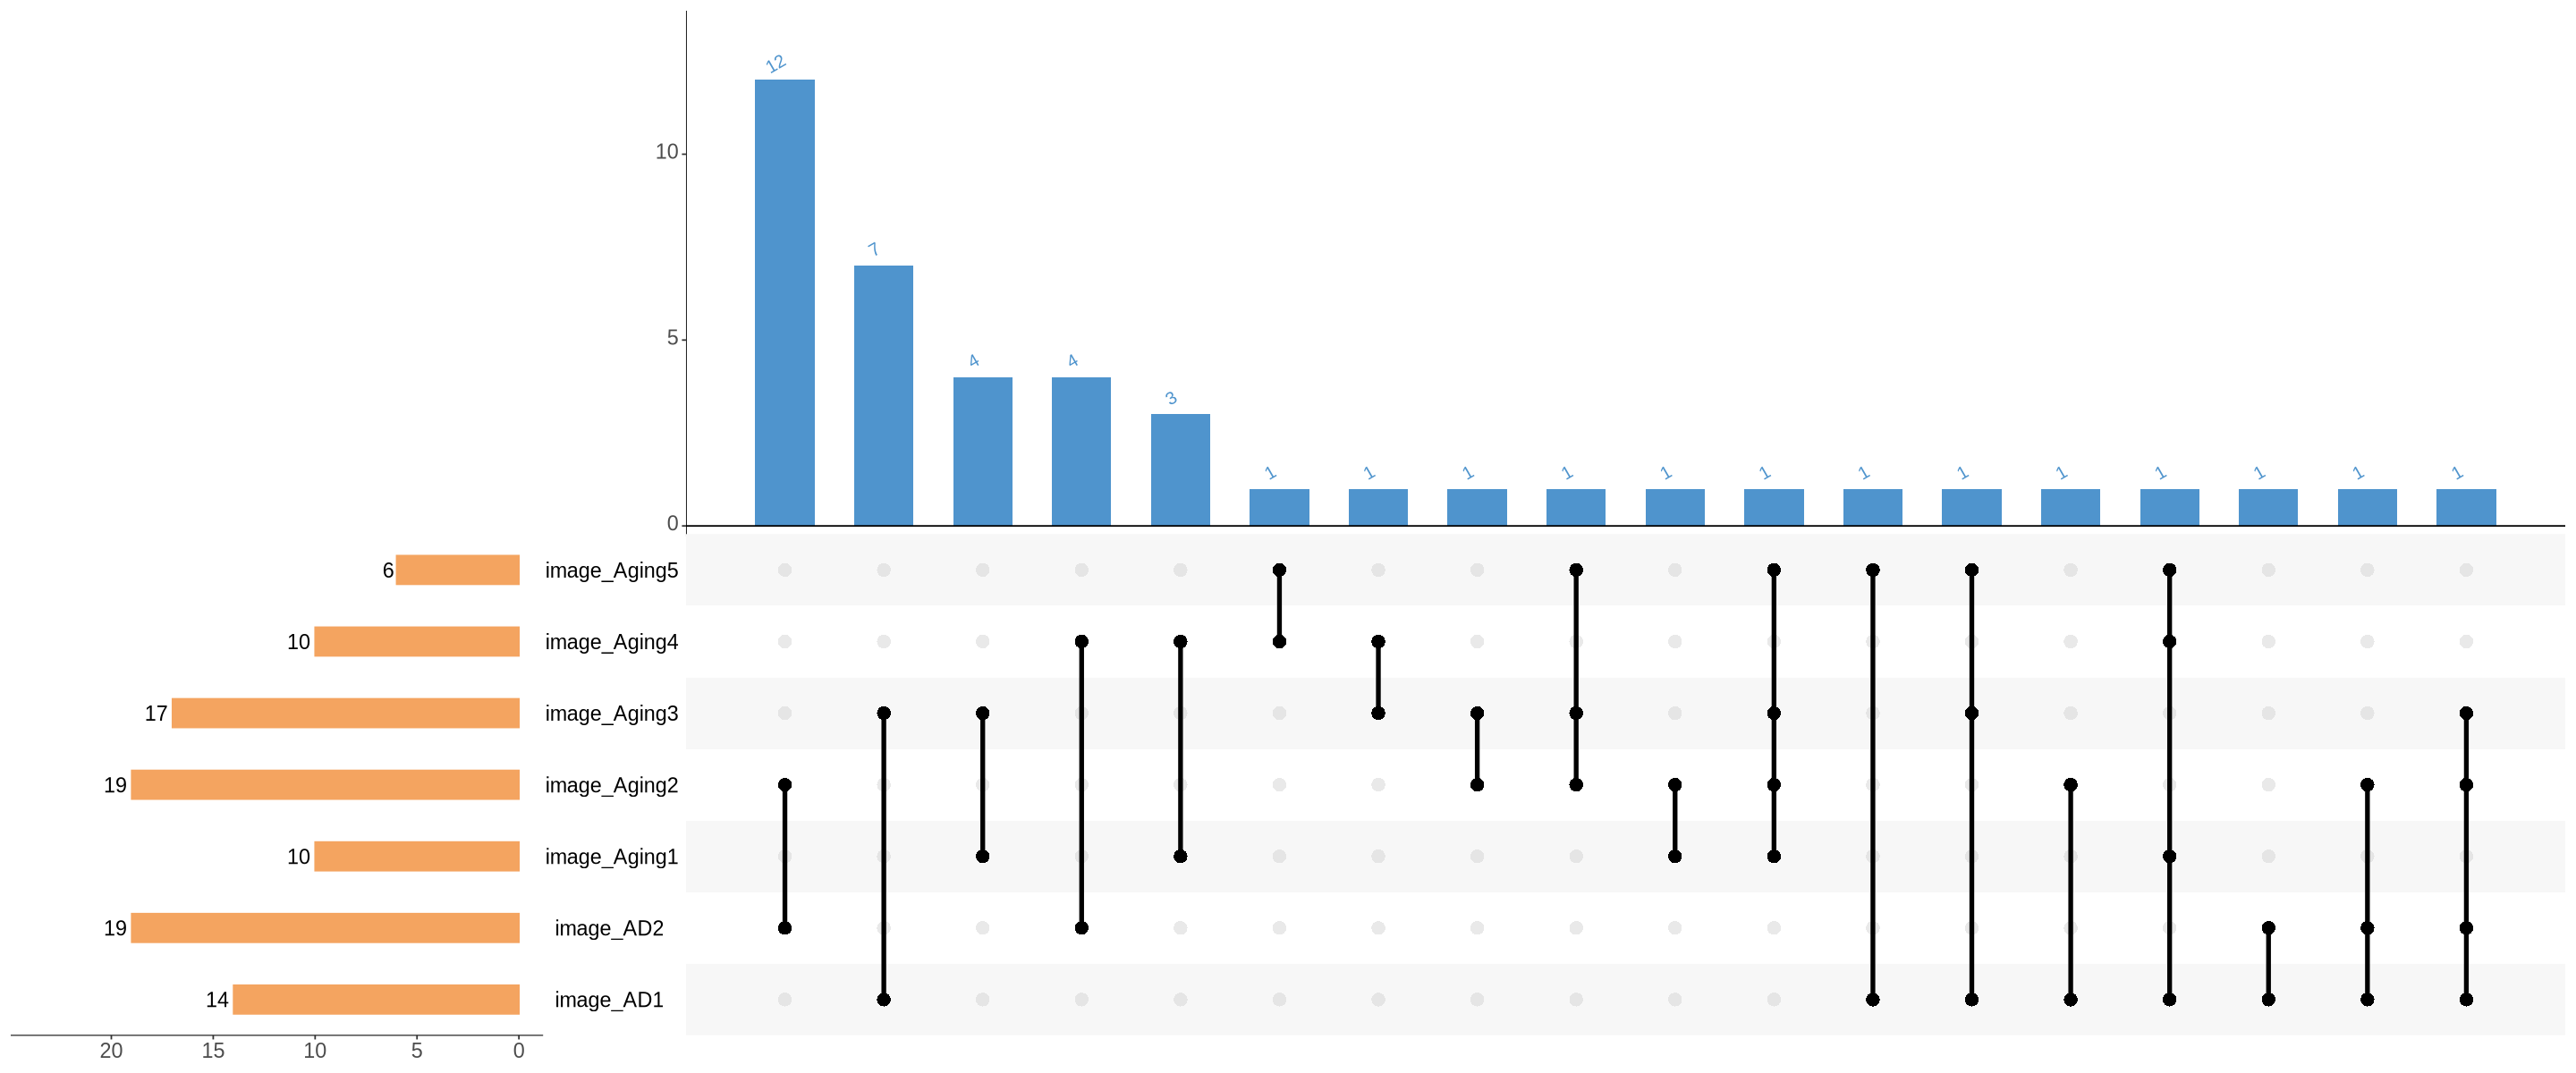

In [15]:
options(repr.plot.width = 24, repr.plot.height = 10)
max_size <- max(unique_cos_block)
p <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = cohorts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

# Display the plot in the notebook
print(p)

# Save the plot to a file
png("upset_plot_cos_block.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [16]:
s2g_ucos <- list()
for (i in 1:nrow(ucos_summary)){
    cos_tmp <- ucos_summary[i,]
    region_name <- cos_tmp$region_name
    files_tmp <- files[grep(region_name, files)]
    ad <- cos_tmp$target_outcome
    cb_results <- readRDS(files_tmp)
    coef <- cb_results$data_info$coef
    ad_cos <- cb_results$ucos_details$ucos$ucos_variables[cos_tmp$ucos_id]
    ad_cos_idx <- cb_results$ucos_details$ucos$ucos_index[cos_tmp$ucos_id]
    s2g_tmp <- c()
    for (i_cos in 1:length(ad_cos)){
        snps <- ad_cos[[i_cos]]
        vcp_cos <- cb_results$ucos_details$ucos_weight[[i_cos]][ad_cos_idx[[i_cos]]]
        coloc_trait <- cos_tmp$outcomes[i_cos]
        event_ID = coloc_trait
        coloc_trait <- strsplit(coloc_trait, "; ")[[1]]
        coef_cos <- sapply(snps, function(ss){
            pos <- which(cb_results$data_info$variables == ss)
            tmp <- sapply(coloc_trait, function(tt) coef[[tt]][pos] )
            return(paste0(tmp, collapse = ";"))
        })
        variantID <- snps
        snps <- as.matrix(sapply(snps, function(ss) strsplit(ss, ":")[[1]] ))
        cos_id <- paste0(region_name, ":", cos_tmp$ucos_id[i_cos])
        tmp <- tibble("#chr" = snps[1,],
                          "start" = snps[2,],
                          "end" = snps[2,],
                          "a1" = snps[4,],
                          "a2" = snps[3,],
                          "variant_ID" = variantID,
                          "region_ID" = region_name,
                          "event_ID" = event_ID,
                          "cos_ID" = cos_id,
                          "vcp" = vcp_cos,
                          "cos_npc" = NA,
                          "min_npc_outcome" = NA,
                          "coef" = coef_cos
                         )
        s2g_tmp <- rbind(s2g_tmp, tmp)           
    }
    s2g_ucos[[i]] <- s2g_tmp
}

In [17]:
s2g_ucos <- Reduce(rbind, s2g_ucos)
s2g_ucos <- s2g_ucos %>% arrange(`#chr`, start)
s2g_ucos %>% head
s2g_ucos %>% dim

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>
chr1,116965623,116965623,T,TC,chr1:116965623:TC:T,chr1_115338054_117562321,image_Aging1,chr1_115338054_117562321:ucos1:y2,0.03473185,NA,NA,-0.000347318547741445
chr1,116983188,116983188,T,C,chr1:116983188:C:T,chr1_115338054_117562321,image_Aging1,chr1_115338054_117562321:ucos1:y2,0.06442439,NA,NA,-0.000644243882293443
chr1,116983433,116983433,G,A,chr1:116983433:A:G,chr1_115338054_117562321,image_Aging1,chr1_115338054_117562321:ucos1:y2,0.06035154,NA,NA,-0.000603515383809108
chr1,116984477,116984477,T,A,chr1:116984477:A:T,chr1_115338054_117562321,image_Aging1,chr1_115338054_117562321:ucos1:y2,0.06143773,NA,NA,-0.000614377332468131
chr1,116985744,116985744,A,G,chr1:116985744:G:A,chr1_115338054_117562321,image_Aging1,chr1_115338054_117562321:ucos1:y2,0.05595284,NA,NA,-0.000559528387602375
chr1,116987237,116987237,AT,A,chr1:116987237:A:AT,chr1_115338054_117562321,image_Aging1,chr1_115338054_117562321:ucos1:y2,0.07608308,NA,NA,-0.000760830811494934


[1] 12966    13

In [18]:
s2g <- rbind(s2g, s2g_ucos)
s2g %>% dim

[1] 14656    13

In [19]:
fwrite(s2g, "/home/rl3328/image_QTL/colocboost/image7/Image_meta_colocboost_export_filtered_ucos.bed", sep = "\t")


In [22]:
s2g <- fread("/home/rl3328/image_QTL/colocboost/image7/Image_meta_colocboost_export_filtered_ucos.bed")
cohorts <- c("image_AD1", "image_AD2","image_Aging1", "image_Aging2", "image_Aging3", "image_Aging4","image_Aging5")
coloc <- vector("list", length(cohorts)) %>% setNames(cohorts)
for (i in 1:nrow(s2g)){
    traits <- s2g$event_ID[i]
    for (con in cohorts){
        if_coloc <- grepl(con, traits)
        if (if_coloc){
            coloc[[con]] <- c(coloc[[con]], s2g$cos_ID[i])
        }
    }
}
coloc <- lapply(coloc, unique)
unique_ucos_block = sapply(coloc, length)
unique_ucos_block

image_AD1    image_AD2 image_Aging1 image_Aging2 image_Aging3 image_Aging4 
          34           41           44           42           31           36 
image_Aging5 
          37

pdf 
  2

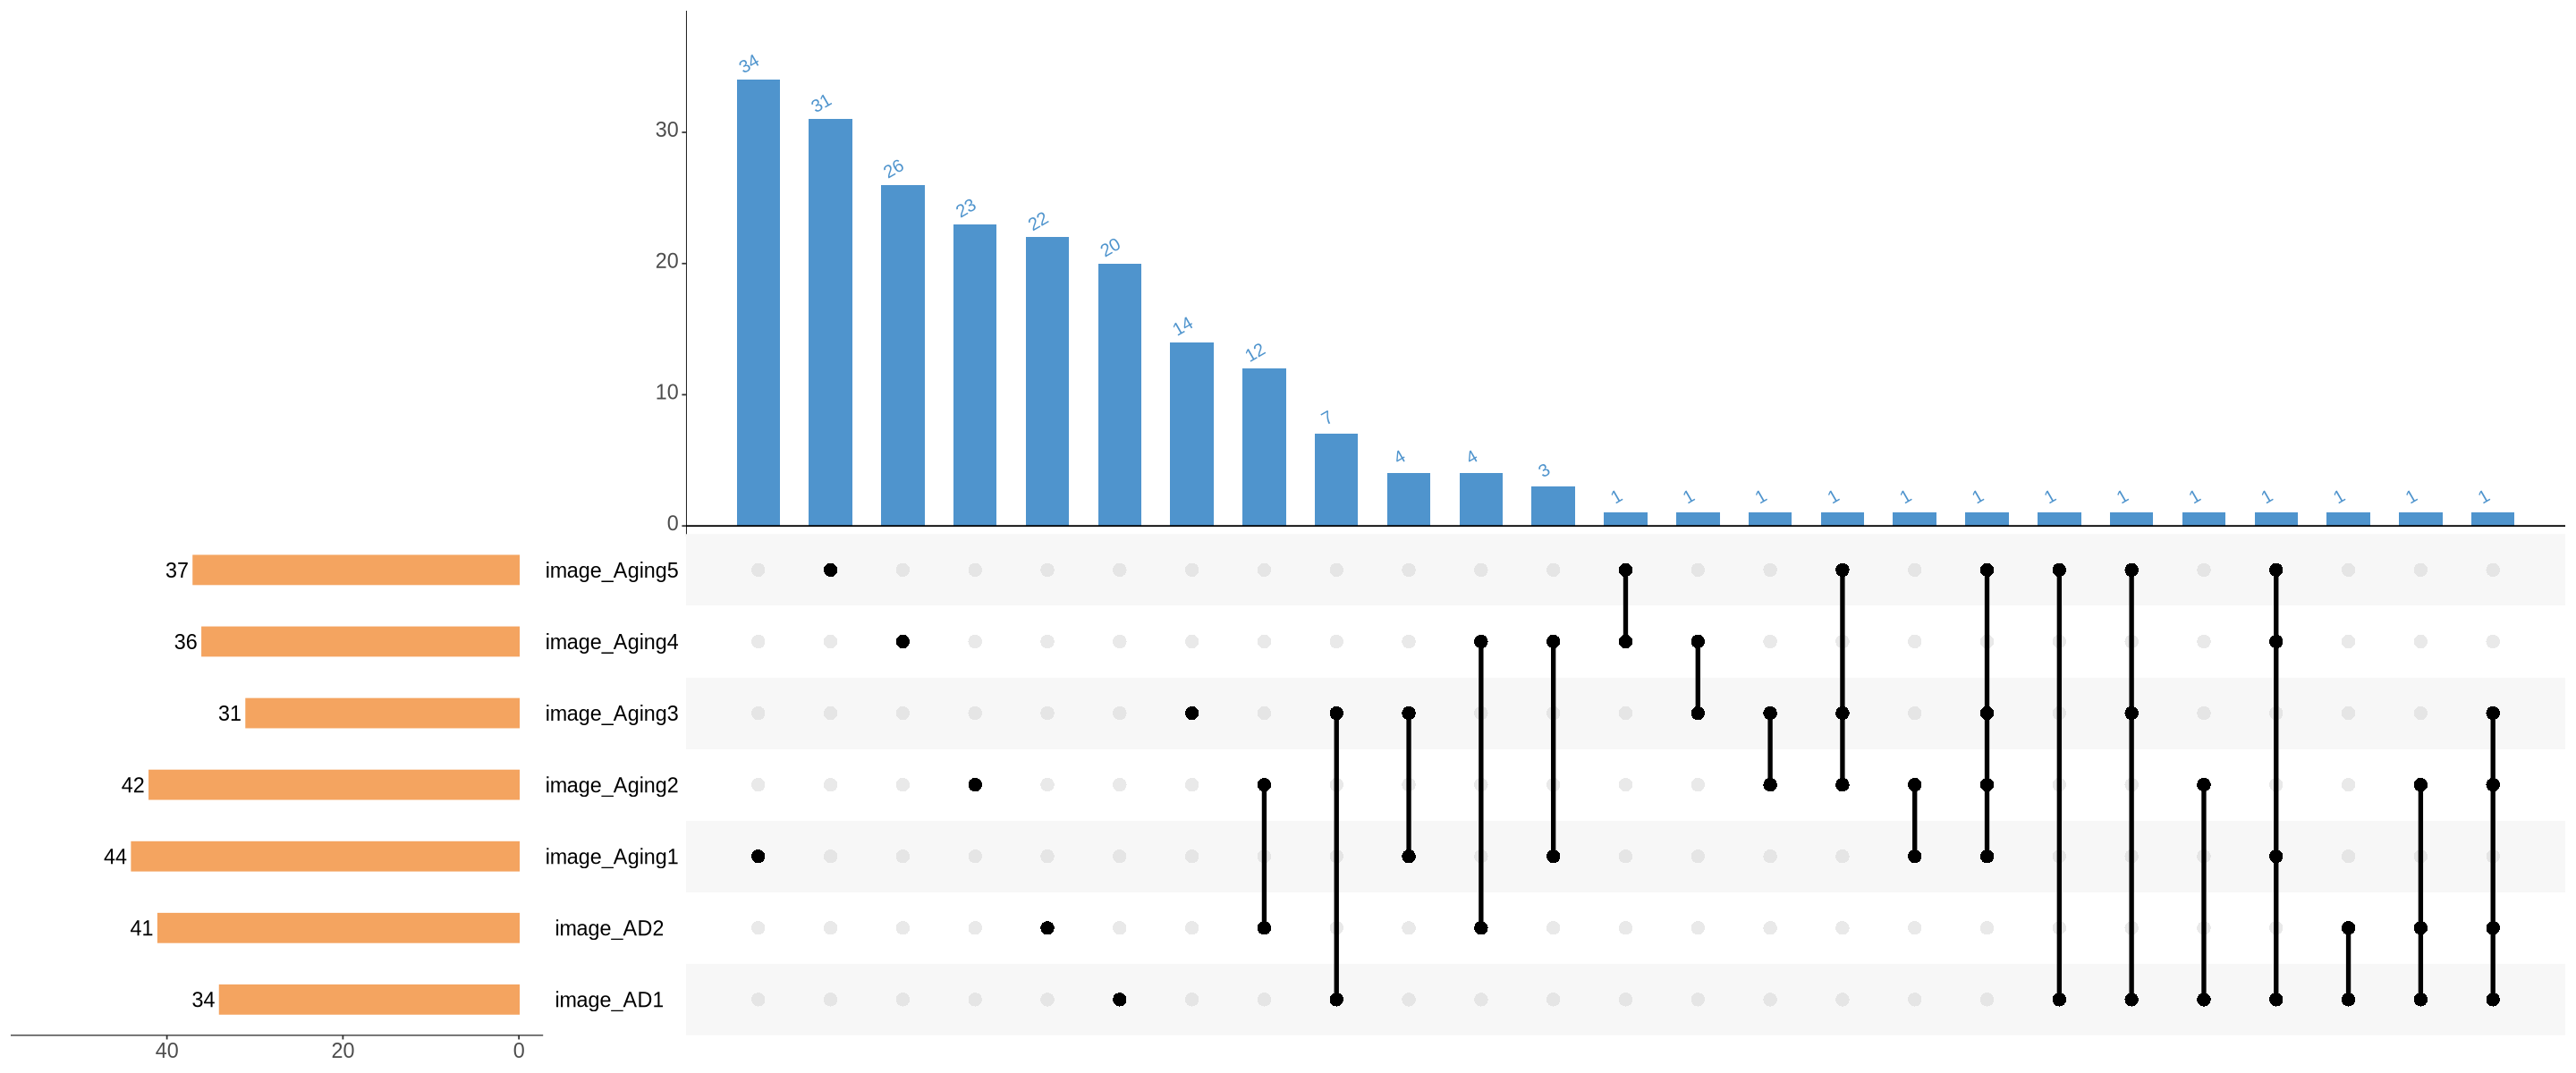

In [23]:
options(repr.plot.width = 24, repr.plot.height = 10)
max_size <- max(unique_ucos_block)
p <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = cohorts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

# Display the plot in the notebook
print(p)

# Save the plot to a file
png("upset_plot_ucos_block.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

### 4. Comparison with Finemapping Upset plot

#### **Image**
1. Finemapping Upset plot for 'CoS'
![image_finemapping_upset_plot_cos.png](./finemap_image_upset_plot_cos_block.png)

2. Finemapping Upset plot for 'uCoS'
![image_finemapping_upset_plot_ucos.png](./finemap_image_upset_plot_ucos_block.png)


### 5. Overlap between variants from colocboost and the **GVC gene list**

#### **CoS**

In [ ]:
interested_gene_list = fread("./157_gene_list.txt")
# First, let's filter the interested_gene_list to only include the genes you're interested in
genes_of_interest <- c("ABCA7", "ABI3", "APOE", "APP", "APBB3", "BIN1", "EPHA1", "CASP7", 
                      "CR1", "MS4A6A", "PILRA", "PLCG2", "PSEN1", "PSEN2", "ADAM10", 
                      "RIN3", "SORL1", "SPI1", "TREM2", "PICALM")

# Filter the dataframe to only include these genes
filtered_gene_list <- interested_gene_list[interested_gene_list$gene_name %in% genes_of_interest, ]
filtered_gene_list = filtered_gene_list |> select(gene_id,gene_name_ori)
setkey(filtered_gene_list, gene_id)
fwrite(filtered_gene_list, "GVC_gene_list.txt", sep = "\t")


In [ ]:
## Annotate the gene list positions based on our v103 genomic reference
!sos run /home/rl3328/xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd /home/rl3328/image_QTL/colocboost/image7+ad6/ \
    --phenoFile /home/rl3328/image_QTL/colocboost/image7+ad6/GVC_gene_list.txt \
    --phenotype-id-column gene_name \
    --molecular-trait-type gene \
    --coordinate-annotation /mnt/mfs/statgen/molecular_phenotype_calling/reference_data/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [5]:
filtered_gene_list = fread("/home/rl3328/image_QTL/colocboost/image7+ad6/GVC_gene_list.gene_list.tsv")
head(filtered_gene_list)
dim(filtered_gene_list)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,207496146,207641764,ENSG00000203710,+,CR1
chr1,226870183,226927725,ENSG00000143801,+,PSEN2
chr1,226870183,226987544,ENSG00000288674,+,AL391628.1
chr2,127048026,127107287,ENSG00000136717,-,BIN1
chr5,140558267,140564780,ENSG00000113108,-,APBB3
chr6,41158505,41163185,ENSG00000095970,-,TREM2


[1] 21  6

In [3]:
cos_variables = cos_summary$colocalized_variables
cos_variables_list <- strsplit(cos_variables, ";")
length(cos_variables_list)

cos_variable_unique = unique(unlist(cos_variables_list))
length(cos_variable_unique)

[1] 43

[1] 1690

In [10]:
# Parse variant to extract chr, position, and alleles
parse_variant <- function(variant_str) {
  # Format: "chr1:11698737:A>T"
  parts <- strsplit(variant_str, ":")[[1]]
  chr <- parts[1]
  position <- as.numeric(parts[2])
  
  # Also extract alleles if needed
  if(length(parts) > 2) {
    alleles <- parts[3]
  } else {
    alleles <- NA
  }
  
  return(list(chr = chr, position = position, alleles = alleles))
}

# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_str, window_size = 500000) {
  variant <- parse_variant(variant_str)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  # Check if the variant is within the cis window boundaries
  return(gene_chr == variant$chr && 
         variant$position >= cis_start && 
         variant$position <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_unique, window_size = 500000) {
  matching_variants <- character(0)
  variant_positions <- numeric(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  for(variant in variants_unique) {
    parsed_variant <- parse_variant(variant)
    if(gene_chr == parsed_variant$chr && 
       parsed_variant$position >= cis_start && 
       parsed_variant$position <= cis_end) {
      matching_variants <- c(matching_variants, variant)
      variant_positions <- c(variant_positions, parsed_variant$position)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = paste0(gene_chr, "_", cis_start, "_", cis_end),
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = NA,
      contained_variants = NA
    ))
  }
}

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$cis_window <- NA
filtered_gene_list$contained_variants <- NA

# Window size parameter (can be changed if needed)
window_size <- 500000

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    cos_variable_unique,
    window_size
  )
  
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$cis_window[i] <- result$cis_window
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand  gene_name
    <char>     <int>     <int>          <char> <char>     <char>
 1:   chr1 207496146 207641764 ENSG00000203710      +        CR1
 2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2
 3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1
 4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1
 5:   chr5 140558267 140564780 ENSG00000113108      -      APBB3
 6:   chr6  41158505  41163185 ENSG00000095970      -      TREM2
 7:   chr7 100367529 100400095 ENSG00000085514      +      PILRA
 8:   chr7 143390288 143408855 ENSG00000146904      -      EPHA1
 9:  chr11  47354859  47378546 ENSG00000066336      -       SPI1
10:  chr11  60172013  60184665 ENSG00000110077      -     MS4A6A
11:  chr11  85957174  86069881 ENSG00000073921      -     PICALM
12:  chr11 121452313 121633762 ENSG00000137642      +      SORL1
13:  chr10 113679161 113730906 ENSG00000165806      +      CASP7
14:  chr14  73136417  732

#### **uCoS**

In [7]:
ucos_variables = ucos_summary$ucos_variables
ucos_variables_list <- strsplit(ucos_variables, ";")
length(ucos_variables_list)

ucos_variable_unique = unique(unlist(ucos_variables_list))
length(ucos_variable_unique)

[1] 170

[1] 12887

In [9]:
# Parse variant to extract chr, position, and alleles
parse_variant <- function(variant_str) {
  # Format: "chr1:11698737:A>T"
  parts <- strsplit(variant_str, ":")[[1]]
  chr <- parts[1]
  position <- as.numeric(parts[2])
  
  # Also extract alleles if needed
  if(length(parts) > 2) {
    alleles <- parts[3]
  } else {
    alleles <- NA
  }
  
  return(list(chr = chr, position = position, alleles = alleles))
}

# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_str, window_size = 500000) {
  variant <- parse_variant(variant_str)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  # Check if the variant is within the cis window boundaries
  return(gene_chr == variant$chr && 
         variant$position >= cis_start && 
         variant$position <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_unique, window_size = 500000) {
  matching_variants <- character(0)
  variant_positions <- numeric(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  for(variant in variants_unique) {
    parsed_variant <- parse_variant(variant)
    if(gene_chr == parsed_variant$chr && 
       parsed_variant$position >= cis_start && 
       parsed_variant$position <= cis_end) {
      matching_variants <- c(matching_variants, variant)
      variant_positions <- c(variant_positions, parsed_variant$position)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = paste0(gene_chr, "_", cis_start, "_", cis_end),
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = NA,
      contained_variants = NA
    ))
  }
}

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$cis_window <- NA
filtered_gene_list$contained_variants <- NA

# Window size parameter (can be changed if needed)
window_size <- 500000

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    ucos_variable_unique,
    window_size
  )
  
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$cis_window[i] <- result$cis_window
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand  gene_name
    <char>     <int>     <int>          <char> <char>     <char>
 1:   chr1 207496146 207641764 ENSG00000203710      +        CR1
 2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2
 3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1
 4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1
 5:   chr5 140558267 140564780 ENSG00000113108      -      APBB3
 6:   chr6  41158505  41163185 ENSG00000095970      -      TREM2
 7:   chr7 100367529 100400095 ENSG00000085514      +      PILRA
 8:   chr7 143390288 143408855 ENSG00000146904      -      EPHA1
 9:  chr11  47354859  47378546 ENSG00000066336      -       SPI1
10:  chr11  60172013  60184665 ENSG00000110077      -     MS4A6A
11:  chr11  85957174  86069881 ENSG00000073921      -     PICALM
12:  chr11 121452313 121633762 ENSG00000137642      +      SORL1
13:  chr10 113679161 113730906 ENSG00000165806      +      CASP7
14:  chr14  73136417  732

In [22]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr5:140142743:T:C"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_AD2,ucos1:y2,0.729154,chr5:140142743:T:C,0.1355744,36,521; 528; 516; 530; 515; 513; 571; 570; 789; 793; 569; 791; 776; 767; 772; 778; 573; 556; 577; 728; 759; 745; 736; 619; 638; 676; 674; 704; 618; 622; 661; 602; 625; 687; 607; 701,chr5:140142743:T:C; chr5:140146712:A:G; chr5:140139404:T:C; chr5:140149810:G:A; chr5:140137976:G:T; chr5:140137463:A:G; chr5:140171602:G:A; chr5:140170538:T:C; chr5:140293499:T:C; chr5:140299969:G:T; chr5:140169396:A:G; chr5:140298717:A:G; chr5:140285995:A:T; chr5:140282103:A:G; chr5:140285132:C:A; chr5:140286203:G:A; chr5:140172039:T:C; chr5:140164870:A:G; chr5:140176843:A:G; chr5:140257980:A:G; chr5:140278293:C:A; chr5:140270787:G:A; chr5:140264131:T:G; chr5:140196024:C:CAG; chr5:140209617:GC:G; chr5:140228801:C:G; chr5:140228335:G:A; chr5:140239368:G:A; chr5:140195688:T:C; chr5:140197634:T:C; chr5:140222809:G:C; chr5:140187632:G:T; chr5:140199754:T:C; chr5:140232507:A:G; chr5:140189996:A:T; chr5:140238500:C:T,0.135574369121986; 0.107339993672913; 0.105152958537031; 0.0919198932686629; 0.0902551298342018; 0.0886574393191106; 0.0184925048544086; 0.0175179458554897; 0.0170362509212804; 0.0168696896689461; 0.0168198490436453; 0.0166485525348532; 0.0157706067005434; 0.015233030788091; 0.0151751175889293; 0.01487709423554; 0.014792501473431; 0.0144004407284987; 0.0131815459894428; 0.0118922232925183; 0.00983036588669361; 0.00919210871373843; 0.00874667660911577; 0.00767853012617359; 0.00764270723222904; 0.00762891567230894; 0.00762873477500947; 0.00724171101471272; 0.0072244827239174; 0.00711797585960949; 0.00668818155447015; 0.00643350996105341; 0.00642215284745296; 0.00638940629989526; 0.00636947972299617; 0.00631252810052352,chr5_139769624_142619401,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr5_139769624_142619401.cb_xqtl_joint_gwas.rds


In [23]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr7:100493592:G:A"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging1,ucos1:y3,0.95819,chr7:100493592:G:A,0.02737423,75,3913; 3917; 3916; 3862; 3918; 3921; 3922; 3786; 3823; 3851; 3787; 3789; 3792; 3919; 3825; 3798; 3796; 3869; 3849; 3797; 3819; 3817; 3814; 3824; 3886; 3802; 3811; 3822; 3805; 3842; 3872; 3795; 3820; 3920; 3864; 3850; 3853; 3865; 3860; 3855; 3838; 3801; 3852; 3816; 3844; 3845; 3818; 3804; 3830; 3832; 3836; 3837; 3885; 3877; 3857; 3848; 3847; 3893; 3813; 3883; 3882; 3876; 3880; 3889; 3888; 3898; 3833; 3827; 3908; 3911; 3909; 3900; 3806; 3901; 3903,chr7:100493592:G:A; chr7:100499119:G:T; chr7:100498041:C:T; chr7:100457014:GT:G; chr7:100500272:C:T; chr7:100501057:C:G; chr7:100501843:T:C; chr7:100390182:C:T; chr7:100424056:A:G; chr7:100446188:CCCA:C; chr7:100390780:A:G; chr7:100393925:C:T; chr7:100397162:G:A; chr7:100500672:C:T; chr7:100426215:C:T; chr7:100405149:A:G; chr7:100402651:C:A; chr7:100464450:T:TC; chr7:100445432:G:A; chr7:100403318:C:T; chr7:100421281:G:A; chr7:100419221:C:G; chr7:100417501:A:G; chr7:100425685:C:T; chr7:100476397:G:A; chr7:100408097:C:T; chr7:100416690:G:A; chr7:100423995:A:C; chr7:100411599:TG:T; chr7:100438604:TAGG:T; chr7:100467820:A:T; chr7:100400984:G:A; chr7:100423359:G:A; chr7:100500673:C:T; chr7:100458543:C:T; chr7:100445550:A:G; chr7:100448262:A:G; chr7:100458597:T:C; chr7:100456067:T:C; chr7:100448881:A:G; chr7:100435042:G:A; chr7:100406920:T:C; chr7:100446928:T:C; chr7:100418731:A:C; chr7:100440067:T:C; chr7:100441322:C:T; chr7:100419831:G:A; chr7:100411251:G:GA; chr7:100429716:C:G; chr7:100430564:C:T; chr7:100433989:G:A; chr7:100434665:T:C; chr7:100475446:G:C; chr7:100471465:T:C; chr7:100452119:A:G; chr7:100442347:C:T; chr7:100442192:C:T; chr7:100481131:C:T; chr7:100417223:C:T; chr7:100475144:C:T; chr7:100474408:T:C; chr7:100471313:T:C; chr7:100473135:T:C; chr7:100479650:A:G; chr7:100478991:A:G; chr7:100482851:A:T; chr7:100430861:T:C; chr7:100427941:T:C; chr7:100491394:C:T; chr7:100492426:T:C; chr7:100491762:A:G; chr7:100483563:G:A; chr7:100412371:T:C; chr7:100484321:G:A; chr7:100485455:G:A,0.0273742266434359; 0.0263167603811686; 0.0250583186188533; 0.0177223835629652; 0.017537356154934; 0.0161284882021446; 0.0158924454772027; 0.0155638840183413; 0.0155592318240315; 0.0155168518482097; 0.0151541319641385; 0.0138552822274022; 0.0137874761058293; 0.0135220581522332; 0.0132168465439891; 0.0131920715285231; 0.0131403205082971; 0.0129436324223015; 0.0129316646441691; 0.0128733556339944; 0.0128350409159049; 0.0127781938002317; 0.0127446522128182; 0.0127322073488517; 0.0126034508983862; 0.0125595199303219; 0.0124005379120137; 0.0123724493709637; 0.0123354480090653; 0.0122819414509467; 0.0122523905797461; 0.0122316900263931; 0.0121923996610812; 0.0121520009782928; 0.0121494976389392; 0.0121457827961301; 0.0121386220234939; 0.0121365443336784; 0.0121175962194604; 0.0120859244539121; 0.0120277910069596; 0.0119920405564131; 0.0119158590355233; 0.0119098560531667; 0.0117965117786071; 0.0117007731862623; 0.0116767774929213; 0.0115677205968854; 0.0115001874727051; 0.0114373635411655; 0.011431347574827; 0.0114192744322887; 0.0113752891350163; 0.0111759637953576; 0.0111675866110821; 0.0110926630015404; 0.0110400749374509; 0.0107886597458544; 0.0106889874461467; 0.0105773045404043; 0.0105666776176445; 0.0105476123049328; 0.0104349363153285; 0.0104279299713833; 0.0103355043866695; 0.0103248944984657; 0.010282286159343; 0.0102749208138511; 0.0102466409837431; 0.0100111836386099; 0.00999248276508236; 0.00976791382714803; 0.00925947714799669; 0.00854745882815; 0.00839183479327943,chr7_98297733_101733715,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr7_98297733_101733715.cb_xqtl_joint_gwas.rds


In [24]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr11:47146703:A:G"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_AD2,ucos1:y2,0.962465,chr11:47146703:A:G,0.1243228,10,276; 182; 17; 39; 47; 51; 79; 211; 101; 387,chr11:47146703:A:G; chr11:47078316:C:T; chr11:46936748:G:T; chr11:46955857:C:T; chr11:46960612:A:G; chr11:46961687:A:G; chr11:46991890:G:A; chr11:47098515:T:C; chr11:47015399:G:A; chr11:47215808:C:T,0.124322790100904; 0.117204422569769; 0.102188411739238; 0.0915356787452309; 0.0911310714066284; 0.0911230032962141; 0.0897354643889174; 0.0890784308750332; 0.085653577503958; 0.0692217831159399,chr11_46916060_49936088,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr11_46916060_49936088.cb_xqtl_joint_gwas.rds


In [25]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr17:48925181:A:G"))# & str_detect(outcomes, "AD")

outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging5,ucos2:y7,0.537924,chr17:48925181:A:G,0.146875,153,8116; 8146; 8241; 8236; 8251; 8232; 8069; 8037; 8060; 7755; 8039; 8149; 8138; 8143; 8029; 8020; 8031; 8177; 8018; 8022; 8049; 8134; 8120; 8117; 8016; 8079; 8114; 8181; 8161; 8195; 8183; 8184; 7724; 8235; 8254; 8253; 8238; 8230; 8237; 8212; 8201; 8014; 8242; 8250; 8249; 8008; 8221; 8041; 8243; 8059; 8046; 8189; 8187; 8185; 8186; 8055; 8057; 7926; 8224; 8061; 8051; 8215; 8045; 8050; 8240; 7961; 8110; 8068; 8065; 8067; 8070; 8075; 8040; 8035; 8213; 8124; 8203; 8162; 8086; 8206; 8160; 8072; 8199; 8163; 8164; 8204; 8179; 8071; 8159; 8118; 8176; 8112; 8100; 8166; 8102; 8094; 8101; 8080; 8098; 8088; 8126; 8231; 8111; 8044; 8132; 8136; 8139; 8142; 8147; 8144; 8157; 8087; 8092; 8104; 8093; 8158; 8108; 8091; 8096; 8083; 8107; 8115; 8090; 8081; 8172; 8156; 8097; 8214; 8171; 8178; 7870; 8122; 8219; 8247; 8140; 8246; 8223; 8105; 7857; 8033; 8226; 8123; 7813; 7774; 7814; 8030; 8032; 8028; 7807; 7828; 7784; 8024; 8025,chr17:48925181:A:G; chr17:48935189:C:G; chr17:48964800:C:A; chr17:48963251:G:A; chr17:48968500:G:A; chr17:48961940:A:T; chr17:48906458:G:A; chr17:48892897:T:C; chr17:48900991:T:C; chr17:48767335:C:T; chr17:48893147:G:A; chr17:48937289:CT:C; chr17:48932646:G:A; chr17:48934393:G:A; chr17:48890530:G:T; chr17:48887044:G:C; chr17:48891815:G:A; chr17:48945365:C:G; chr17:48884659:G:A; chr17:48887396:A:G; chr17:48898849:C:T; chr17:48931184:C:T; chr17:48926728:G:A; chr17:48925400:G:A; chr17:48884131:C:T; chr17:48910682:G:A; chr17:48925153:C:T; chr17:48947467:G:T; chr17:48940707:G:A; chr17:48950401:C:T; chr17:48948197:T:A; chr17:48948292:C:T; chr17:48758267:T:C; chr17:48962971:G:A; chr17:48969752:A:G; chr17:48968914:A:G; chr17:48963400:T:C; chr17:48961109:A:G; chr17:48963329:T:A; chr17:48954611:T:C; chr17:48951164:C:T; chr17:48883398:G:A; chr17:48965289:A:G; chr17:48968000:C:T; chr17:48967960:G:A; chr17:48879468:C:G; chr17:48958234:C:T; chr17:48895503:C:T; chr17:48966235:T:C; chr17:48900921:A:G; chr17:48898008:G:A; chr17:48949474:G:C; chr17:48949069:C:T; chr17:48948714:G:A; chr17:48948823:A:T; chr17:48900100:T:G; chr17:48900554:A:G; chr17:48840591:C:G; chr17:48958680:C:A; chr17:48902956:C:T; chr17:48899419:C:T; chr17:48955839:C:A; chr17:48897788:AG:A; chr17:48899394:C:G; chr17:48964755:G:A; chr17:48858792:C:T; chr17:48924439:A:G; chr17:48906029:G:A; chr17:48904965:T:A; chr17:48905809:G:C; chr17:48906680:T:A; chr17:48908231:A:C; chr17:48895117:ATCTC:A; chr17:48892721:G:GA; chr17:48955049:G:A; chr17:48929131:T:C; chr17:48951627:T:C; chr17:48942037:A:C; chr17:48914169:T:C; chr17:48952542:C:T; chr17:48940663:A:G; chr17:48907497:A:T; chr17:48950972:G:A; chr17:48942235:T:C; chr17:48942310:C:A; chr17:48951918:G:C; chr17:48945499:A:G; chr17:48907063:C:T; chr17:48940517:G:A; chr17:48925859:G:T; chr17:48944908:C:T; chr17:48925077:G:T; chr17:48920636:T:C; chr17:48942537:C:T; chr17:48921540:A:G; chr17:48918373:A:G; chr17:48920756:T:C; chr17:48911167:A:G; chr17:48919221:T:A; chr17:48916008:G:A; chr17:48929588:T:C; chr17:48961770:T:C; chr17:48925027:G:A; chr17:48897372:T:C; chr17:48930845:A:G; chr17:48932473:G:A; chr17:48932672:G:T; chr17:48934258:C:G; chr17:48936765:T:C; chr17:48934535:C:T; chr17:48939814:T:C; chr17:48914390:G:A; chr17:48917484:G:C; chr17:48922011:C:G; chr17:48917608:G:A; chr17:48940115:T:C; chr17:48922748:C:T; chr17:48917034:C:T; chr17:48919070:C:T; chr17:48911992:A:G; chr17:48922575:C:T; chr17:48925162:G:A; chr17:48916305:T:G; chr17:48911235:C:T; chr17:48944066:C:G; chr17:48939520:C:T; chr17:48919072:G:C; chr17:48955258:G:C; chr17:48944056:A:C; chr17:48945393:C:G; chr17:48817015:A:C; chr17:48928147:T:G; chr17:48957612:A:G; chr17:48967647:C:T; chr17:48933433:CAG:C; chr17:48967101:C:T; chr17:48958507:T:C; chr17:48922311:T:C; chr17:48811212:G:T; chr17:48892303:A:T; chr17:48958931:C:

In [28]:
cos_summary |> filter(str_detect(colocalized_outcomes, "AD2") & str_detect(colocalized_outcomes, "Aging2"))

focal_outcome,colocalized_outcomes,cos_id,purity,top_variable,top_variable_vcp,cos_npc,min_npc_outcome,n_variables,colocalized_index,colocalized_variables,colocalized_variables_vcp,region_name,file
<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
FALSE,image_AD1; image_AD2; image_Aging2; image_Aging3,cos1:y1_y2_y4_y5,0.584213,chr1:50359773:A:C,0.03812748,1.0000,0.9999,88,269; 344; 296; 291; 287; 280; 286; 289; 283; 285; 282; 281; 319; 303; 329; 311; 298; 316; 381; 306; 308; 307; 392; 393; 437; 396; 412; 413; 410; 429; 279; 441; 273; 377; 808; 355; 274; 356; 277; 828; 276; 797; 367; 278; 741; 761; 669; 756; 655; 647; 633; 697; 602; 690; 683; 636; 620; 921; 629; 1043; 1009; 966; 576; 579; 575; 1044; 1041; 1036; 1034; 960; 863; 949; 941; 1098; 1117; 901; 1060; 260; 923; 971; 832; 722; 995; 806; 787; 1142; 825; 988,chr1:50359773:A:C; chr1:50385775:TACATA:T; chr1:50369934:G:A; chr1:50365283:A:G; chr1:50364506:A:G; chr1:50363475:G:A; chr1:50364453:T:C; chr1:50364739:G:A; chr1:50364107:C:T; chr1:50364332:A:C; chr1:50363613:G:A; chr1:50363586:A:G; chr1:50378177:G:C; chr1:50373486:A:C; chr1:50380142:T:G; chr1:50375463:C:T; chr1:50370662:C:T; chr1:50376869:T:C; chr1:50396080:T:C; chr1:50374550:A:G; chr1:50374876:A:G; chr1:50374823:C:A; chr1:50397530:A:G; chr1:50397782:A:G; chr1:50413500:A:T; chr1:50398162:G:C; chr1:50403527:A:T; chr1:50403636:C:T; chr1:50403012:A:G; chr1:50410164:A:G; chr1:50362675:T:TAAA; chr1:50416002:G:A; chr1:50360742:A:T; chr1:50395118:T:A; chr1:50736991:G:A; chr1:50389041:C:T; chr1:50360768:C:T; chr1:50389229:T:C; chr1:50361528:A:T; chr1:50752120:C:T; chr1:50360989:A:G; chr1:50725902:C:A; chr1:50391520:G:A; chr1:50362420:G:A; chr1:50664667:G:T; chr1:50685071:G:A; chr1:50612417:G:A; chr1:50677721:C:T; chr1:50600416:T:C; chr1:50595103:G:A; chr1:50578053:A:T; chr1:50637146:C:G; chr1:50551797:A:G; chr1:50629646:C:A; chr1:50622957:T:A; chr1:50585127:C:T; chr1:50565520:T:G; chr1:50804875:C:T; chr1:50577253:G:A; chr1:50902373:C:T; chr1:50880687:G:T; chr1:50841286:T:C; chr1:50529175:C:T; chr1:50533095:T:C; chr1:50529040:T:C; chr1:50902840:C:T; chr1:50900353:T:C; chr1:50892624:C:A; chr1:50892350:G:A; chr1:50837244:C:G; chr1:50770920:C:T; chr1:50828564:C:T; chr1:50824457:T:C; chr1:50950322:G:A; chr1:50971575:A:G; chr1:50793907:T:C; chr1:50909280:C:G; chr1:50356763:G:A; chr1:50807685:C:G; chr1:50847373:GC:G; chr1:50753494:T:C; chr1:50655000:C:T; chr1:50872196:T:C; chr1:50735430:A:C; chr1:50722922:T:C; chr1:50988577:A:G; chr1:50750912:C:T; chr1:50864353:T:C,0.038127478536143; 0.0260546546996244; 0.023670554744652; 0.0227950407492011; 0.0213311345941755; 0.0213210181763234; 0.0213047532483728; 0.0212991877118599; 0.0212972840212141; 0.021265237798998; 0.0212465282411297; 0.0212240384792511; 0.0212121636966492; 0.0210942769578073; 0.0209409160969438; 0.0206686792171282; 0.0206355195001915; 0.0203397013959814; 0.0201670063657198; 0.0199727875398448; 0.0195358900607493; 0.0194173005074708; 0.0190909201278091; 0.0190519982417937; 0.0183046052005774; 0.0182810312612758; 0.0180070585255977; 0.0179607358118365; 0.0179563596376883; 0.0179298939913906; 0.017611684221588; 0.013948264957684; 0.00995584720915488; 0.00990249444408942; 0.00967945987830277; 0.00966327871023898; 0.0091258207411854; 0.00909242765452467; 0.00896376662661347; 0.00862616527221405; 0.0085892007398316; 0.00857950565766208; 0.00842345557734991; 0.00814236320146078; 0.0068783778337268; 0.00679132463983056; 0.00674749648676776; 0.00670727089879763; 0.00599231286629009; 0.00594880919216723; 0.00575847913355299; 0.00572756969265198; 0.00548689493395771; 0.00538205636925393; 0.00517260297477007; 0.00509974889456999; 0.00503647901016735; 0.00491730581814853; 0.00450284103078824; 0.00446228210136668; 0.00428582300693303; 0.00423984382936926; 0.00417198137453001; 0.00403091120508381; 0.00397330679587293; 0.00388306096580304; 0.00381699022691817; 0.00380637625302449; 0.00380628228206736; 0.00352801449076734; 0.00330219706425827; 0.003289207

### 6. Overlap between variants from colocboost and the 76 gene list

In [5]:
filtered_gene_list = fread("/home/rl3328/image_QTL/colocboost/image7+ad6/Table1_gene_list.gene_list.tsv")
head(filtered_gene_list)
dim(filtered_gene_list)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,109309567,109397917,ENSG00000134243,-,SORT1
chr1,207496146,207641764,ENSG00000203710,+,CR1
chr2,9488485,9556731,ENSG00000151694,-,ADAM17
chr2,37250501,37324832,ENSG00000115825,-,PRKD3
chr2,105744911,105894273,ENSG00000071051,+,NCK2
chr2,127048026,127107287,ENSG00000136717,-,BIN1


[1] 76  6

In [6]:
cos_variables = cos_summary$colocalized_variables
cos_variables_list <- strsplit(cos_variables, ";")
length(cos_variables_list)

cos_variable_unique = unique(unlist(cos_variables_list))
length(cos_variable_unique)

[1] 43

[1] 1690

In [7]:
# Parse variant to extract chr, position, and alleles
parse_variant <- function(variant_str) {
  # Format: "chr1:11698737:A>T"
  parts <- strsplit(variant_str, ":")[[1]]
  chr <- parts[1]
  position <- as.numeric(parts[2])
  
  # Also extract alleles if needed
  if(length(parts) > 2) {
    alleles <- parts[3]
  } else {
    alleles <- NA
  }
  
  return(list(chr = chr, position = position, alleles = alleles))
}

# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_str, window_size = 500000) {
  variant <- parse_variant(variant_str)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  # Check if the variant is within the cis window boundaries
  return(gene_chr == variant$chr && 
         variant$position >= cis_start && 
         variant$position <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_unique, window_size = 500000) {
  matching_variants <- character(0)
  variant_positions <- numeric(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  for(variant in variants_unique) {
    parsed_variant <- parse_variant(variant)
    if(gene_chr == parsed_variant$chr && 
       parsed_variant$position >= cis_start && 
       parsed_variant$position <= cis_end) {
      matching_variants <- c(matching_variants, variant)
      variant_positions <- c(variant_positions, parsed_variant$position)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = paste0(gene_chr, "_", cis_start, "_", cis_end),
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = NA,
      contained_variants = NA
    ))
  }
}

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$cis_window <- NA
filtered_gene_list$contained_variants <- NA

# Window size parameter (can be changed if needed)
window_size <- 500000

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    cos_variable_unique,
    window_size
  )
  
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$cis_window[i] <- result$cis_window
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand gene_name
    <char>     <int>     <int>          <char> <char>    <char>
 1:   chr1 109309567 109397917 ENSG00000134243      -     SORT1
 2:   chr1 207496146 207641764 ENSG00000203710      +       CR1
 3:   chr2   9488485   9556731 ENSG00000151694      -    ADAM17
 4:   chr2  37250501  37324832 ENSG00000115825      -     PRKD3
 5:   chr2 105744911 105894273 ENSG00000071051      +      NCK2
 6:   chr2 127048026 127107287 ENSG00000136717      -      BIN1
 7:   chr2 202874260 203014797 ENSG00000138442      -     WDR12
 8:   chr2 233059966 233207902 ENSG00000168918      +    INPP5D
 9:   chr3 155024123 155183703 ENSG00000196549      +       MME
10:   chr4    986996   1004563 ENSG00000127415      +      IDUA
11:   chr4  10486394  10684767 ENSG00000109684      -      CLNK
12:   chr4  40191052  40246966 ENSG00000168421      +      RHOH
13:   chr5  14704799  14871777 ENSG00000154122      -      ANKH
14:   chr5  86617927  86620961 ENSG00000

In [15]:
cos_summary %>% filter(str_detect(cos_variables, "chr5:151052827:C:T"))

focal_outcome,colocalized_outcomes,cos_id,purity,top_variable,top_variable_vcp,cos_npc,min_npc_outcome,n_variables,colocalized_index,colocalized_variables,colocalized_variables_vcp,region_name,file
<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
FALSE,image_AD2; image_Aging2,cos1:y2_y3,1,chr5:151052827:C:T,0.9997916,1,1,1,2640,chr5:151052827:C:T,0.999791584642908,chr5_149895776_152257891,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr5_149895776_152257891.cb_xqtl_joint_gwas.rds


In [16]:
cos_summary %>% filter(str_detect(colocalized_variables, "chr16:29943634:A:G"))


focal_outcome,colocalized_outcomes,cos_id,purity,top_variable,top_variable_vcp,cos_npc,min_npc_outcome,n_variables,colocalized_index,colocalized_variables,colocalized_variables_vcp,region_name,file
<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
FALSE,image_Aging2; image_Aging3,cos1:y4_y5,0.81543,chr16:29943634:A:G,0.135396,0.9976,0.9976,27,237; 236; 233; 230; 207; 208; 206; 213; 195; 229; 201; 224; 197; 228; 227; 223; 225; 221; 214; 215; 444; 445; 196; 219; 216; 434; 448,chr16:29943634:A:G; chr16:29943333:T:G; chr16:29939508:C:T; chr16:29937080:G:A; chr16:29920743:C:T; chr16:29921370:T:C; chr16:29920578:G:A; chr16:29923498:C:T; chr16:29913101:A:T; chr16:29935624:T:C; chr16:29916381:G:A; chr16:29932138:C:A; chr16:29914124:C:T; chr16:29935387:G:A; chr16:29935349:T:C; chr16:29932046:T:C; chr16:29933511:G:A; chr16:29928556:A:G; chr16:29925333:A:G; chr16:29926331:G:A; chr16:30130664:T:C; chr16:30130700:G:C; chr16:29913584:A:G; chr16:29927972:T:C; chr16:29927499:A:G; chr16:30123335:T:C; chr16:30133058:C:G,0.135395974538753; 0.115474245238779; 0.0612159827346076; 0.0548171575609577; 0.0455313185513884; 0.0427215188750495; 0.0420353858925722; 0.0415179930338158; 0.037919674477446; 0.0374974048229822; 0.0366674563491252; 0.0347775469665912; 0.0335317176041494; 0.0315371917430907; 0.0314759435342945; 0.0307064084410784; 0.0247734765810026; 0.0150101291964568; 0.0144858731021187; 0.0137285253376258; 0.0135411224385981; 0.0119057692760827; 0.0116521349297219; 0.0110376623940048; 0.0104072696896494; 0.00959764866181578; 0.00896127990794227,chr16_29685831_46381513,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr16_29685831_46381513.cb_xqtl_joint_gwas.rds


In [17]:
cos_summary %>% filter(str_detect(colocalized_variables, "chr20:63917861:C:A"))

focal_outcome,colocalized_outcomes,cos_id,purity,top_variable,top_variable_vcp,cos_npc,min_npc_outcome,n_variables,colocalized_index,colocalized_variables,colocalized_variables_vcp,region_name,file
<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
FALSE,image_Aging1; image_Aging3,cos1:y3_y5,0.97428,chr20:63917861:C:A,0.06493395,0.9981,0.9981,19,1039; 1040; 1042; 1044; 1030; 1027; 1031; 1025; 1056; 1062; 1061; 1054; 1047; 1024; 986; 1019; 999; 985; 983,chr20:63917861:C:A; chr20:63917872:C:T; chr20:63918002:T:C; chr20:63918212:G:A; chr20:63916056:C:T; chr20:63915679:T:C; chr20:63916222:C:A; chr20:63915263:A:G; chr20:63923356:T:C; chr20:63924620:G:A; chr20:63924198:G:GTT; chr20:63922145:C:T; chr20:63920545:G:A; chr20:63914709:T:G; chr20:63902461:T:C; chr20:63913311:G:C; chr20:63907902:C:A; chr20:63902082:T:G; chr20:63901629:G:C,0.0649339459862277; 0.0575566967240503; 0.0574726087102223; 0.0574639619243446; 0.057119147825445; 0.0571158442272508; 0.0570911826161832; 0.0570636694397679; 0.0565897008509175; 0.051743444789644; 0.0507954479322223; 0.0503084423434228; 0.0497987168943663; 0.0480907344714064; 0.0472201454420311; 0.0463763113930659; 0.0389198439949862; 0.0254391413831321; 0.025324241624711,chr20_63558301_64331539,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr20_63558301_64331539.cb_xqtl_joint_gwas.rds


#### **uCoS**

In [8]:
ucos_variables = ucos_summary$ucos_variables
ucos_variables_list <- strsplit(ucos_variables, ";")
length(ucos_variables_list)

ucos_variable_unique = unique(unlist(ucos_variables_list))
length(ucos_variable_unique)

[1] 170

[1] 12887

In [9]:
# Parse variant to extract chr, position, and alleles
parse_variant <- function(variant_str) {
  # Format: "chr1:11698737:A>T"
  parts <- strsplit(variant_str, ":")[[1]]
  chr <- parts[1]
  position <- as.numeric(parts[2])
  
  # Also extract alleles if needed
  if(length(parts) > 2) {
    alleles <- parts[3]
  } else {
    alleles <- NA
  }
  
  return(list(chr = chr, position = position, alleles = alleles))
}

# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_str, window_size = 500000) {
  variant <- parse_variant(variant_str)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  # Check if the variant is within the cis window boundaries
  return(gene_chr == variant$chr && 
         variant$position >= cis_start && 
         variant$position <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_unique, window_size = 500000) {
  matching_variants <- character(0)
  variant_positions <- numeric(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  for(variant in variants_unique) {
    parsed_variant <- parse_variant(variant)
    if(gene_chr == parsed_variant$chr && 
       parsed_variant$position >= cis_start && 
       parsed_variant$position <= cis_end) {
      matching_variants <- c(matching_variants, variant)
      variant_positions <- c(variant_positions, parsed_variant$position)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = paste0(gene_chr, "_", cis_start, "_", cis_end),
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      cis_window = NA,
      contained_variants = NA
    ))
  }
}

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$cis_window <- NA
filtered_gene_list$contained_variants <- NA

# Window size parameter (can be changed if needed)
window_size <- 500000

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    ucos_variable_unique,
    window_size
  )
  
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$cis_window[i] <- result$cis_window
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand gene_name
    <char>     <int>     <int>          <char> <char>    <char>
 1:   chr1 109309567 109397917 ENSG00000134243      -     SORT1
 2:   chr1 207496146 207641764 ENSG00000203710      +       CR1
 3:   chr2   9488485   9556731 ENSG00000151694      -    ADAM17
 4:   chr2  37250501  37324832 ENSG00000115825      -     PRKD3
 5:   chr2 105744911 105894273 ENSG00000071051      +      NCK2
 6:   chr2 127048026 127107287 ENSG00000136717      -      BIN1
 7:   chr2 202874260 203014797 ENSG00000138442      -     WDR12
 8:   chr2 233059966 233207902 ENSG00000168918      +    INPP5D
 9:   chr3 155024123 155183703 ENSG00000196549      +       MME
10:   chr4    986996   1004563 ENSG00000127415      +      IDUA
11:   chr4  10486394  10684767 ENSG00000109684      -      CLNK
12:   chr4  40191052  40246966 ENSG00000168421      +      RHOH
13:   chr5  14704799  14871777 ENSG00000154122      -      ANKH
14:   chr5  86617927  86620961 ENSG00000

In [18]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr2:203039582:T:C"))


outcomes     ucos_id  purity   top_variable       top_variable_vpa
1 image_Aging5 ucos1:y6 0.909091 chr2:203039582:T:C 0.02825839      
  n_variables
1 219        
  ucos_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 2372; 2373; 1983; 2206; 1986; 1994; 1991; 1995; 1980; 1982; 2193; 2301; 2107; 2106; 2292; 2268; 1973; 2271; 2432; 1976; 2423; 2103; 2313; 2337; 2310; 2314; 2355; 1975; 2004; 2353; 2201; 2343; 2369; 2364; 2362; 2323; 2322; 2329; 2255; 2320; 2217; 2237; 1979; 2293; 2215; 2297; 2305; 2295; 1977; 2294; 2290; 2001; 2281; 2291; 2285; 2247; 2279; 2248; 2272; 2258; 2253; 2266; 2257; 2243; 2265; 2250; 2263; 2260; 2283; 2238; 2276; 2239; 2246; 2184; 2189; 2192; 2180; 2014; 2015; 2212; 2194; 2205; 2013; 2185; 2208; 2191; 2273; 2287; 2188; 2347; 2199; 2183; 2219; 2177; 2169; 2173; 2174; 2230; 2175; 2167; 2226; 2221; 2223; 2228; 2144; 2198; 2125; 2111; 2142; 2114; 2160; 2348; 2131; 2132; 2152; 2126; 2154; 2112; 2164; 2116; 2119; 2088; 2121; 2150; 2159; 2141; 2148; 2163; 2143; 2140; 2051; 2052; 2012; 2232; 2158; 2179; 2010; 1972; 1967; 1971; 2459; 2389; 2031; 1959; 1969; 2127; 2178; 2400; 2402; 2416; 2454; 2053; 2464; 2153; 2251; 2479; 2033; 2034; 2471; 2037; 2030; 2039; 2475; 2415; 2007; 2398; 2074; 2057; 2509; 2060; 2073; 2044; 1964; 2042; 2408; 2075; 2069; 2448; 2067; 2068; 2498; 2070; 2535; 2410; 2488; 2017; 2084; 2081; 2782; 2056; 2527; 2686; 2022; 2029; 2146; 2020; 2099; 2091; 2093; 2092; 2100; 2101; 2105; 2086; 2098; 2095; 2110; 2517; 2109; 2515; 2513; 2675; 2578; 1956; 2600; 2082; 2083; 2486; 1970
  ucos_variables                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [19]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr6:32"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging5,ucos1:y6,0.657310,chr6:32457215:C:T,0.05523623,124,3689; 3436; 3282; 3233; 3270; 3165; 3583; 3089; 2297; 2671; 2770; 2929; 2537; 7197; 2458; 2656; 2223; 2146; 2283; 2313; 2057; 2170; 2061; 2017; 1973; 2081; 1944; 6516; 1962; 2281; 2621; 2619; 1910; 1864; 2692; 2599; 1117; 1763; 856; 1768; 1076; 980; 1021; 7048; 918; 590; 2662; 1041; 834; 1664; 1734; 6041; 569; 1451; 1494; 471; 468; 474; 467; 496; 536; 735; 570; 177; 456; 6988; 624; 574; 554; 2106; 6480; 1218; 174; 755; 7268; 85; 518; 6987; 219; 437; 7083; 7278; 656; 6180; 6222; 7237; 6730; 167; 7219; 6918; 6290; 7242; 6720; 5923; 419; 276; 5849; 5928; 402; 413; 401; 399; 425; 3856; 378; 7357; 394; 7349; 356; 370; 383; 7347; 417; 375; 7333; 387; 4155; 350; 361; 7396; 3232; 393; 3302; 397,chr6:32457215:C:T; chr6:32446658:C:T; chr6:32431560:T:C; chr6:32427949:A:G; chr6:32431064:A:G; chr6:32419655:G:A; chr6:32453024:T:G; chr6:32413503:G:C; chr6:32335915:T:A; chr6:32379293:AAT:A; chr6:32390424:G:C; chr6:32400685:G:A; chr6:32366050:A:C; chr6:32698749:C:T; chr6:32357785:G:A; chr6:32377912:T:G; chr6:32327875:T:C; chr6:32317585:C:T; chr6:32334605:C:T; chr6:32337767:A:G; chr6:32307105:C:A; chr6:32321175:G:A; chr6:32307844:C:T; chr6:32301680:C:T; chr6:32295886:C:T; chr6:32309594:A:C; chr6:32289422:T:C; chr6:32669525:G:A; chr6:32293475:T:G; chr6:32334326:TTG:T; chr6:32375562:G:A; chr6:32375459:A:G; chr6:32284355:A:G; chr6:32272295:T:A; chr6:32381780:A:T; chr6:32373094:C:T; chr6:32112414:G:C; chr6:32262212:TG:T; chr6:31951083:A:G; chr6:32262479:T:G; chr6:32092090:A:G; chr6:32047051:G:A; chr6:32061428:G:A; chr6:32694696:A:C; chr6:31973120:A:G; chr6:31850331:C:T; chr6:32378686:ATTTTGTG:A; chr6:32067917:C:T; chr6:31942164:A:G; chr6:32250343:G:A; chr6:32258704:A:G; chr6:32636444:A:G; chr6:31839763:A:G; chr6:32226853:G:C; chr6:32231204:C:T; chr6:31799896:T:TA; chr6:31798883:C:T; chr6:31801022:A:C; chr6:31798207:G:A; chr6:31809415:A:G; chr6:31830357:TA:T; chr6:31902549:G:A; chr6:31840659:C:T; chr6:31658236:C:T; chr6:31793436:G:A; chr6:32691868:A:G; chr6:31864261:A:G; chr6:31842835:C:T; chr6:31834324:C:T; chr6:32312814:T:C; chr6:32668825:G:C; chr6:32164195:G:C; chr6:31657087:A:G; chr6:31910656:G:A; chr6:32700886:G:A; chr6:31628361:A:G; chr6:31819390:C:T; chr6:32691832:T:C; chr6:31668965:A:G; chr6:31781407:G:A; chr6:32695578:G:C; chr6:32701169:C:T; chr6:31872700:C:T; chr6:32655446:A:C; chr6:32658707:T:C; chr6:32699818:G:T; chr6:32683864:G:T; chr6:31652743:T:G; chr6:32699394:A:T; chr6:32689659:T:C; chr6:32660651:C:A; chr6:32700133:G:A; chr6:32683700:A:T; chr6:32634921:C:T; chr6:31766568:G:T; chr6:31698647:A:C; chr6:32632988:G:A; chr6:32634983:A:C; chr6:31760120:C:T; chr6:31765689:T:C; chr6:31759697:A:G; chr6:31759017:T:C; chr6:31771343:G:T; chr6:32464869:G:A; chr6:31748105:T:C; chr6:32704662:T:C; chr6:31757508:A:G; chr6:32704439:A:T; chr6:31740686:C:A; chr6:31744419:G:A; chr6:31750619:C:G; chr6:32704023:T:G; chr6:31766173:CAG:C; chr6:31746254:G:A; chr6:32703430:T:G; chr6:31753256:G:A; chr6:32486042:C:T; chr6:31738087:C:T; chr6:31742001:A:G; chr6:32706116:C:A; chr6:32427921:A:T; chr6:31757453:G:A; chr6:32433755:T:A; chr6:31758476:T:C,0.0552362345023444; 0.0336070180094487; 0.0315928671091414; 0.0311304032259385; 0.0276337578792237; 0.02589668974987; 0.021478038787201; 0.0211008489367939; 0.0207265802642485; 0.0201220784626637; 0.0172644780218112; 0.0157292650607744; 0.0155481818702059; 0.0149918189607533; 0.0148413600378525; 0.0144198474899777; 0.0129338931027405; 0.0120555095205445; 0.0120233569448663; 0.0119253818058794; 0.0116431136352538; 0.0116426516911136; 0.0115613270121211; 0.0115532461495748; 0.0115262968506594; 0.0115142000929891; 0.0108640518390268; 0.0107823212483452; 0.0106440925832384; 0.00952342623487501; 0.00933992591865984; 0.00933903584645346; 0.00891270805141675; 0.008860517081

In [20]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr7:7655552:T:C"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging2,ucos1:y4,0.772817,chr7:7655552:T:C,0.5775651,13,2776; 2769; 2757; 2785; 2755; 2750; 2766; 2780; 2761; 2786; 2816; 2730; 2726,chr7:7655552:T:C; chr7:7652852:G:T; chr7:7649522:G:A; chr7:7657263:GC:G; chr7:7648912:A:G; chr7:7648209:G:A; chr7:7651545:C:T; chr7:7656483:C:G; chr7:7650736:C:T; chr7:7657549:A:G; chr7:7663382:C:G; chr7:7642544:C:T; chr7:7642064:T:C,0.577565085025828; 0.164249539985897; 0.0308502291631927; 0.0276773011772341; 0.0276553092938239; 0.0262595767998725; 0.0207263983052095; 0.0196202188160586; 0.0188776574437111; 0.0176047986498814; 0.0111845814624505; 0.00688558870845724; 0.00502915238460877,chr7_6928965_7769511,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr7_6928965_7769511.cb_xqtl_joint_gwas.rds


In [21]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr7:7655552:T:C"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging2,ucos1:y4,0.772817,chr7:7655552:T:C,0.5775651,13,2776; 2769; 2757; 2785; 2755; 2750; 2766; 2780; 2761; 2786; 2816; 2730; 2726,chr7:7655552:T:C; chr7:7652852:G:T; chr7:7649522:G:A; chr7:7657263:GC:G; chr7:7648912:A:G; chr7:7648209:G:A; chr7:7651545:C:T; chr7:7656483:C:G; chr7:7650736:C:T; chr7:7657549:A:G; chr7:7663382:C:G; chr7:7642544:C:T; chr7:7642064:T:C,0.577565085025828; 0.164249539985897; 0.0308502291631927; 0.0276773011772341; 0.0276553092938239; 0.0262595767998725; 0.0207263983052095; 0.0196202188160586; 0.0188776574437111; 0.0176047986498814; 0.0111845814624505; 0.00688558870845724; 0.00502915238460877,chr7_6928965_7769511,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr7_6928965_7769511.cb_xqtl_joint_gwas.rds


In [22]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr11:47146703:A:G"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_AD2,ucos1:y2,0.962465,chr11:47146703:A:G,0.1243228,10,276; 182; 17; 39; 47; 51; 79; 211; 101; 387,chr11:47146703:A:G; chr11:47078316:C:T; chr11:46936748:G:T; chr11:46955857:C:T; chr11:46960612:A:G; chr11:46961687:A:G; chr11:46991890:G:A; chr11:47098515:T:C; chr11:47015399:G:A; chr11:47215808:C:T,0.124322790100904; 0.117204422569769; 0.102188411739238; 0.0915356787452309; 0.0911310714066284; 0.0911230032962141; 0.0897354643889174; 0.0890784308750332; 0.085653577503958; 0.0692217831159399,chr11_46916060_49936088,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr11_46916060_49936088.cb_xqtl_joint_gwas.rds


In [23]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr16:86994242:A:T"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging5,ucos1:y7,0.864115,chr16:86994242:A:T,0.1026376,34,682; 683; 677; 680; 675; 670; 699; 707; 664; 663; 681; 692; 693; 676; 696; 698; 695; 662; 701; 697; 720; 694; 711; 703; 671; 674; 710; 708; 706; 713; 705; 743; 718; 709,chr16:86994242:A:T; chr16:86994254:T:C; chr16:86993749:A:G; chr16:86994111:G:A; chr16:86993453:A:G; chr16:86992857:C:T; chr16:86997199:C:T; chr16:86997703:C:A; chr16:86991387:C:G; chr16:86991057:G:A; chr16:86994166:C:T; chr16:86996608:T:C; chr16:86996613:C:G; chr16:86993498:A:C; chr16:86996955:C:T; chr16:86997178:T:A; chr16:86996784:G:A; chr16:86990806:G:C; chr16:86997450:C:A; chr16:86997087:T:C; chr16:86999799:C:T; chr16:86996739:A:G; chr16:86998192:T:C; chr16:86997509:C:T; chr16:86992887:T:A; chr16:86993180:A:C; chr16:86998179:C:T; chr16:86997745:A:G; chr16:86997698:A:G; chr16:86998464:C:T; chr16:86997697:T:C; chr16:87004258:C:G; chr16:86998921:T:C; chr16:86997930:A:G,0.102637551787082; 0.0806112703128734; 0.0674443147930683; 0.0671278135817722; 0.0641926555368739; 0.0478027586720646; 0.0474765352553599; 0.0339618048067425; 0.0297007943281125; 0.0238637168540428; 0.0217977248572633; 0.0211501193872908; 0.0204782459995546; 0.0202165099442266; 0.0198713717113432; 0.0192380739456371; 0.0192295781793451; 0.018385337772762; 0.0179963048212219; 0.0179955280391167; 0.0171276167596935; 0.0170650734618051; 0.0153263378571716; 0.0145957435308378; 0.0141928140220799; 0.0139932979919697; 0.0137090522574748; 0.0132065728441981; 0.0131248105715103; 0.0125788576817738; 0.0125672978959227; 0.0122351453412871; 0.0106663623228497; 0.0102306828860763,chr16_86782214_88382277,/home/rl3328/image_QTL/colocboost/image7/MultiGWAS_analysis//Image_meta.chr16_86782214_88382277.cb_xqtl_joint_gwas.rds


In [24]:
ucos_summary %>% filter(str_detect(ucos_variables, "chr17:48925181:A:G"))


outcomes,ucos_id,purity,top_variable,top_variable_vpa,n_variables,ucos_index,ucos_variables,ucos_variables_vpa,region_name,file
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
image_Aging5,ucos2:y7,0.537924,chr17:48925181:A:G,0.146875,153,8116; 8146; 8241; 8236; 8251; 8232; 8069; 8037; 8060; 7755; 8039; 8149; 8138; 8143; 8029; 8020; 8031; 8177; 8018; 8022; 8049; 8134; 8120; 8117; 8016; 8079; 8114; 8181; 8161; 8195; 8183; 8184; 7724; 8235; 8254; 8253; 8238; 8230; 8237; 8212; 8201; 8014; 8242; 8250; 8249; 8008; 8221; 8041; 8243; 8059; 8046; 8189; 8187; 8185; 8186; 8055; 8057; 7926; 8224; 8061; 8051; 8215; 8045; 8050; 8240; 7961; 8110; 8068; 8065; 8067; 8070; 8075; 8040; 8035; 8213; 8124; 8203; 8162; 8086; 8206; 8160; 8072; 8199; 8163; 8164; 8204; 8179; 8071; 8159; 8118; 8176; 8112; 8100; 8166; 8102; 8094; 8101; 8080; 8098; 8088; 8126; 8231; 8111; 8044; 8132; 8136; 8139; 8142; 8147; 8144; 8157; 8087; 8092; 8104; 8093; 8158; 8108; 8091; 8096; 8083; 8107; 8115; 8090; 8081; 8172; 8156; 8097; 8214; 8171; 8178; 7870; 8122; 8219; 8247; 8140; 8246; 8223; 8105; 7857; 8033; 8226; 8123; 7813; 7774; 7814; 8030; 8032; 8028; 7807; 7828; 7784; 8024; 8025,chr17:48925181:A:G; chr17:48935189:C:G; chr17:48964800:C:A; chr17:48963251:G:A; chr17:48968500:G:A; chr17:48961940:A:T; chr17:48906458:G:A; chr17:48892897:T:C; chr17:48900991:T:C; chr17:48767335:C:T; chr17:48893147:G:A; chr17:48937289:CT:C; chr17:48932646:G:A; chr17:48934393:G:A; chr17:48890530:G:T; chr17:48887044:G:C; chr17:48891815:G:A; chr17:48945365:C:G; chr17:48884659:G:A; chr17:48887396:A:G; chr17:48898849:C:T; chr17:48931184:C:T; chr17:48926728:G:A; chr17:48925400:G:A; chr17:48884131:C:T; chr17:48910682:G:A; chr17:48925153:C:T; chr17:48947467:G:T; chr17:48940707:G:A; chr17:48950401:C:T; chr17:48948197:T:A; chr17:48948292:C:T; chr17:48758267:T:C; chr17:48962971:G:A; chr17:48969752:A:G; chr17:48968914:A:G; chr17:48963400:T:C; chr17:48961109:A:G; chr17:48963329:T:A; chr17:48954611:T:C; chr17:48951164:C:T; chr17:48883398:G:A; chr17:48965289:A:G; chr17:48968000:C:T; chr17:48967960:G:A; chr17:48879468:C:G; chr17:48958234:C:T; chr17:48895503:C:T; chr17:48966235:T:C; chr17:48900921:A:G; chr17:48898008:G:A; chr17:48949474:G:C; chr17:48949069:C:T; chr17:48948714:G:A; chr17:48948823:A:T; chr17:48900100:T:G; chr17:48900554:A:G; chr17:48840591:C:G; chr17:48958680:C:A; chr17:48902956:C:T; chr17:48899419:C:T; chr17:48955839:C:A; chr17:48897788:AG:A; chr17:48899394:C:G; chr17:48964755:G:A; chr17:48858792:C:T; chr17:48924439:A:G; chr17:48906029:G:A; chr17:48904965:T:A; chr17:48905809:G:C; chr17:48906680:T:A; chr17:48908231:A:C; chr17:48895117:ATCTC:A; chr17:48892721:G:GA; chr17:48955049:G:A; chr17:48929131:T:C; chr17:48951627:T:C; chr17:48942037:A:C; chr17:48914169:T:C; chr17:48952542:C:T; chr17:48940663:A:G; chr17:48907497:A:T; chr17:48950972:G:A; chr17:48942235:T:C; chr17:48942310:C:A; chr17:48951918:G:C; chr17:48945499:A:G; chr17:48907063:C:T; chr17:48940517:G:A; chr17:48925859:G:T; chr17:48944908:C:T; chr17:48925077:G:T; chr17:48920636:T:C; chr17:48942537:C:T; chr17:48921540:A:G; chr17:48918373:A:G; chr17:48920756:T:C; chr17:48911167:A:G; chr17:48919221:T:A; chr17:48916008:G:A; chr17:48929588:T:C; chr17:48961770:T:C; chr17:48925027:G:A; chr17:48897372:T:C; chr17:48930845:A:G; chr17:48932473:G:A; chr17:48932672:G:T; chr17:48934258:C:G; chr17:48936765:T:C; chr17:48934535:C:T; chr17:48939814:T:C; chr17:48914390:G:A; chr17:48917484:G:C; chr17:48922011:C:G; chr17:48917608:G:A; chr17:48940115:T:C; chr17:48922748:C:T; chr17:48917034:C:T; chr17:48919070:C:T; chr17:48911992:A:G; chr17:48922575:C:T; chr17:48925162:G:A; chr17:48916305:T:G; chr17:48911235:C:T; chr17:48944066:C:G; chr17:48939520:C:T; chr17:48919072:G:C; chr17:48955258:G:C; chr17:48944056:A:C; chr17:48945393:C:G; chr17:48817015:A:C; chr17:48928147:T:G; chr17:48957612:A:G; chr17:48967647:C:T; chr17:48933433:CAG:C; chr17:48967101:C:T; chr17:48958507:T:C; chr17:48922311:T:C; chr17:48811212:G:T; chr17:48892303:A:T; chr17:48958931:C: